In [8]:
import os
import json

base = "/Users/kevin/Downloads/SecRL/secgym/env/questions/min_overlap/test"

count = 0
for file in os.listdir(base):
    if file.endswith(".json"):
        with open(os.path.join(base, file), "r") as f:
            data = json.load(f)
        
        print(file)
        pqcount = {}
        for i, q in enumerate(data):
            count += 1
            if len(q["shortest_alert_path"]) not in pqcount:
                pqcount[len(q["shortest_alert_path"])] = 0
            pqcount[len(q["shortest_alert_path"])] += 1

        # for k, v in pqcount.items():
        #     print(f"Shortest alert path length: {k}, count: {v}")
        print(f"Total number of questions: {len(data)}")
        print("-" * 50) 
print(count)

        

incident_38_qa_incident_o1-ga_c42.json
Total number of questions: 11
--------------------------------------------------
incident_34_qa_incident_o1-ga_c42.json
Total number of questions: 82
--------------------------------------------------
incident_5_qa_incident_o1-ga_c42.json
Total number of questions: 98
--------------------------------------------------
incident_39_qa_incident_o1-ga_c42.json
Total number of questions: 98
--------------------------------------------------
incident_134_qa_incident_o1-ga_c42.json
Total number of questions: 57
--------------------------------------------------
incident_322_qa_incident_o1-ga_c42.json
Total number of questions: 56
--------------------------------------------------
incident_166_qa_incident_o1-ga_c42.json
Total number of questions: 87
--------------------------------------------------
incident_55_qa_incident_o1-ga_c42.json
Total number of questions: 100
--------------------------------------------------
589


In [9]:
import os
import json
from collections import defaultdict

base = "/Users/kevin/Downloads/SecRL/secgym/env/questions/min_overlap/test"

total_pqcount = defaultdict(int)

for file in os.listdir(base):
    if file.endswith(".json"):
        with open(os.path.join(base, file), "r") as f:
            data = json.load(f)
        
        pqcount = {}
        for q in data:
            length = len(q["shortest_alert_path"])
            if length not in pqcount:
                pqcount[length] = 0
            pqcount[length] += 1

        # Aggregate counts into total_pqcount
        for k, v in pqcount.items():
            total_pqcount[k] += v

print("Total count of each length from all incidents:")
for length, count in sorted(total_pqcount.items()):
    print(f"Length: {length}, Count: {count}")

        

Total count of each length from all incidents:
Length: 1, Count: 46
Length: 3, Count: 413
Length: 5, Count: 98
Length: 7, Count: 31
Length: 9, Count: 1


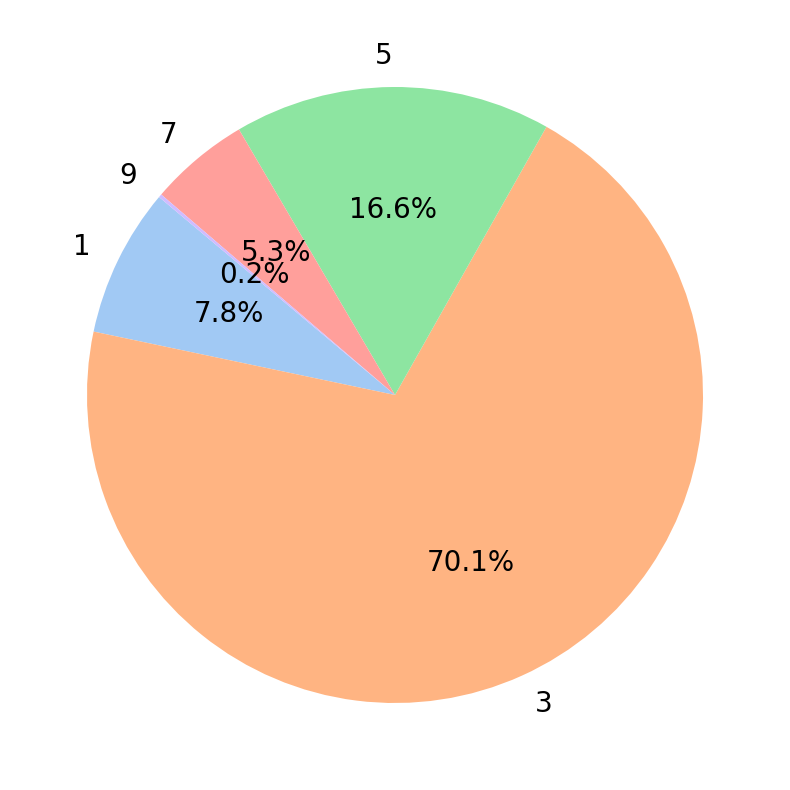

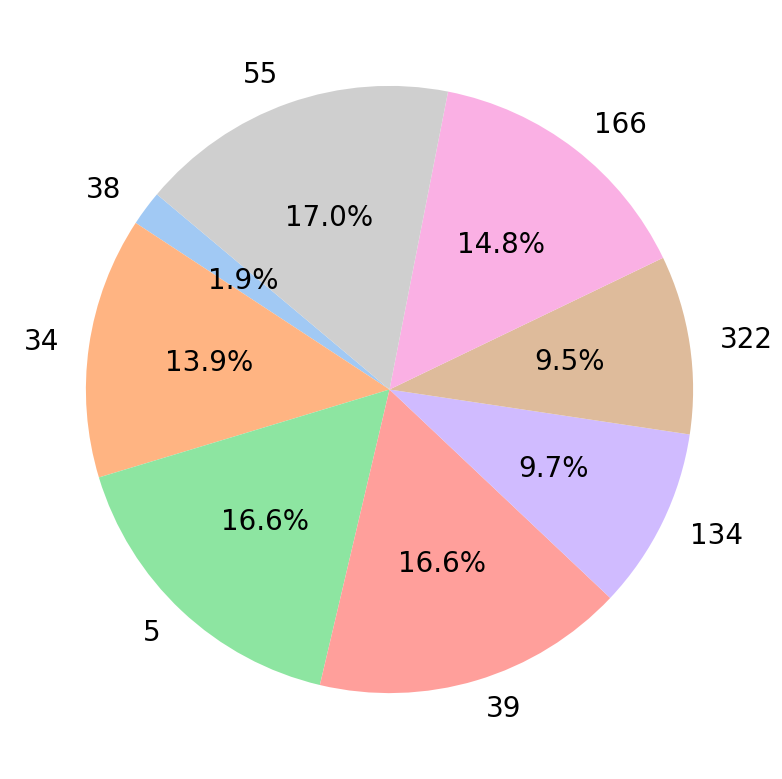

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

# Data for length and count
length_count = {1: 46, 3: 413, 5: 98, 7: 31, 9: 1}

# Data for incident and count
incident_count = {
    "38": 11,
    "34": 82,
    "5": 98,
    "39": 98,
    "134": 57,
    "322": 56,
    "166": 87,
    "55": 100
}
# Function to create a pie plot with actual word count
def create_pie_plot_with_count(data, show_percentage=True, font_size=19):
    labels = list(data.keys())
    sizes = list(data.values())
    colors = sns.color_palette("pastel", len(data))

    plt.figure(figsize=(8, 8), tight_layout=True)
    if show_percentage:
        autopct = '%1.1f%%'
    else:
        autopct = lambda p: f'{int(round(p * sum(sizes) / 100))}'

    plt.pie(
        sizes, 
        labels=labels, 
        startangle=140, 
        colors=colors, 
        autopct=autopct, 
        textprops={'fontsize': font_size}
    )
    plt.show()

# Create pie plot for length and count (default to percentage)
create_pie_plot_with_count(length_count, font_size=20)

# Create pie plot for incident and count (show actual word count)
create_pie_plot_with_count(incident_count, show_percentage=True, font_size=20)


In [11]:
from secgym.qagen.alert_graph import AlertGraph
import os

# iterate over folder

graph_dir = "/Users/kevin/Downloads/SecRL/secgym/qagen/graph_files"

for filename in os.listdir(graph_dir):
    if filename.endswith(".graphml"):
        alert_graph = AlertGraph()
        alert_graph.load_graph_from_graphml(filepath=f"{graph_dir}/{filename}")
        print(filename, f"Num nodes: {len(alert_graph.graph.nodes)}", f"Num alerts: {len(alert_graph.alerts)}")
        # alert_graph.plot_custom_graph()

incident_34.graphml Num nodes: 27 Num alerts: 11
incident_166.graphml Num nodes: 30 Num alerts: 11
incident_55.graphml Num nodes: 110 Num alerts: 27
incident_5.graphml Num nodes: 169 Num alerts: 68
incident_38.graphml Num nodes: 17 Num alerts: 4
incident_134.graphml Num nodes: 26 Num alerts: 9
incident_39.graphml Num nodes: 137 Num alerts: 47
incident_322.graphml Num nodes: 38 Num alerts: 9


In [96]:
import json
a = "/Users/kevin/Downloads/SecRL/secgym/env/questions/min_overlap/test/incident_322_qa_incident_o1-ga_c42.json"

with open(a, "r") as f:
    data = json.load(f)


questions = ['33-16', '25-33', '25-0', '0-23', '22-23', '25-2', '25-16']

selected_questions = []
# extract the questions from the json file
for q in data:
    start_alert = q["start_alert"]
    end_alert = q["end_alert"]
    if start_alert == 0 or end_alert == 0:
        continue

    # print(f"{start_alert}-{end_alert}")
    if f"{start_alert}-{end_alert}" in questions:
        print(f"Context: {q['context']}")
        print(f"Question: {q['question']}")
        print(f"Answer: {q['answer']}")
        print(f"Start alert: {start_alert}")
        print(f"End alert: {end_alert}")
        print(f"Shortest alert path: {q['shortest_alert_path']}")
        print(f"Start entities: {q['start_entities']}")
        print(f"End entities: {q['end_entities']}")
        print("-" * 50)
        selected_questions.append(q)

    

# used_nodes = set()
# for q in data:
#     for node in q["shortest_alert_path"]:
#         used_nodes.add(node)

#     for entity in q["start_entities"]:
#         used_nodes.add(entity)
#     for entity in q["end_entities"]:
#         used_nodes.add(entity)

# print(len(used_nodes))
    

Context: A malicious URL `https://dj01161621.bravesand-e1ccd718.eastus.azurecontainerapps.io/` was clicked on host `vnevado-win11h`, which triggered a process `msedge.exe`. This is part of a broader security incident where multiple alerts, including a suspicious Azure Resource Manager operation from a proxy IP address, were reported. Microsoft Defender for Resource Manager detected a resource management operation from an IP address that is associated with proxy services, such as TOR. Often, such operations can indicate malicious activities.
Question: There is also a suspicious credential dump from NTDS.dit related to this incident. Can you identify the file name of the process used to dump the NTDS.dit?
Answer: ntdsutil.exe
Start alert: 33
End alert: 16
Shortest alert path: [33, 8, 25, 21, 16]
Start entities: [13, 24, 34, 35, 36, 37]
End entities: [20]
--------------------------------------------------
Context: A security incident was detected involving a suspicious Azure Resource Mana

In [ ]:
# Question: What is the URL that the user accessed in the email which was subsequently quarantined by ZAP?
# Answer: https://dj01161621.bravesand-e1ccd718.eastus.azurecontainerapps.io/
# Start alert: 22
# End alert: 23
# Shortest alert path: [22, 21, 25, 8, 23]
# Start entities: [17, 18, 19, 20]
# End entities: [24]

In [103]:
selected_questions[1]

{'context': 'A security incident was detected involving a suspicious Azure Resource Manager operation from an IP address associated with proxy services, such as TOR. This activity may indicate a threat actor attempting to hide their source IP. The operation in question was performed on the host `vnevado-dc` with Subscription ID `7e838342-601f-4552-9baf-0dfb300cf555`, Resource Group `ctfcat`, and several Resource IDs related to the virtual machine and network interfaces. The proxy IP address in question is `253.1.244.215`.',
 'question': 'As part of the same incident, a user clicked on a malicious URL. Can you provide the malicious URL?',
 'answer': 'https://dj01161621.bravesand-e1ccd718.eastus.azurecontainerapps.io/',
 'solution': ['There was an Azure Resource Manager operation detected from a suspicious proxy IP address associated with the email account `Hailey Johnson@vnevado.alpineskihouse.co`.',
  'A malicious URL `https://dj01161621.bravesand-e1ccd718.eastus.azurecontainerapps.io/

In [ ]:
import os
import json
import pandas as pd
import numpy as np
from collections import defaultdict

a = {
    "gpt-4o-mini": "BaselineAgent_4o-mini_c71_alert_level_t0_s25_trial1",
    "gpt-4o": "BaselineAgent_gpt-4o_c70_alert_level_t0_s25_trial1",
    "o1-mini": "BaselineAgent_o1-mini_c92_alert_level_t0_s25_trial1",
    "o3-mini": "BaselineAgent_o3-mini_c99_alert_level_t0_s25_trial1",
    "aa": "ReactAgent_gpt-4o_c121_alert_level_t0_s15_trial1",
    "bb": "ReactAgent_4o-mini_c131_alert_level_t0_s15_trial1",

}

log_path = "/Users/kevin/Downloads/SecRL/secgym/final_results"
incident_id = 322

# Dictionary to store accuracy for each question
question_accuracy = defaultdict(list)

# Process each model
for model_name, folder_name in a.items():
    # Handle tuple case for some model entries
    if isinstance(folder_name, tuple):
        folder_name = folder_name[0]
    
    # Read agent data file for this model
    file_path = os.path.join(log_path, folder_name, f"agent_incident_{incident_id}.json")
    
    if os.path.exists(file_path):
        with open(file_path, "r") as f:
            data = json.load(f)
            
        # Process each question
        for q in data:
            # Use 'nodes' as the key for each question (in format like "23-33")
            question_key = q['nodes']
            if question_key not in question_accuracy:
                question_accuracy[question_key] = []
            
            question_accuracy[question_key].append(q['reward'])

    

# get average reward for each question
avg_question_accuracy = {k: np.mean(v) for k, v in question_accuracy.items()}
# Sort the dictionary by avrage reward
sorted_avg_question_accuracy = dict(sorted(avg_question_accuracy.items(), key=lambda item: item[1], reverse=True))
# print
for k, v in sorted_avg_question_accuracy.items():
    print(f"Question: {k}, Average Reward: {v:.2f}")

# 25-2


Question: 23-0, Average Reward: 1.00
Question: 33-0, Average Reward: 1.00
Question: 16-0, Average Reward: 1.00
Question: 2-0, Average Reward: 1.00
Question: 11-0, Average Reward: 0.84
Question: 22-33, Average Reward: 0.83
Question: 0-32, Average Reward: 0.83
Question: 2-33, Average Reward: 0.83
Question: 22-2, Average Reward: 0.83
Question: 22-0, Average Reward: 0.67
Question: 33-16, Average Reward: 0.67
Question: 25-33, Average Reward: 0.67
Question: 25-0, Average Reward: 0.67
Question: 0-23, Average Reward: 0.67
Question: 22-23, Average Reward: 0.67
Question: 25-2, Average Reward: 0.67
Question: 25-16, Average Reward: 0.67
Question: 11-32, Average Reward: 0.50
Question: 11-2, Average Reward: 0.50
Question: 23-32, Average Reward: 0.50
Question: 25-32, Average Reward: 0.50
Question: 32-23, Average Reward: 0.50
Question: 16-2, Average Reward: 0.50
Question: 11-33, Average Reward: 0.37
Question: 23-23, Average Reward: 0.33
Question: 22-22, Average Reward: 0.33
Question: 16-25, Average Re

In [3]:
from secgym.qagen.alert_graph import AlertGraph
import os


a = "/Users/kevin/Downloads/SecRL/secgym/qagen/graph_files/incident_322.graphml"
alert_graph = AlertGraph()
alert_graph.load_graph_from_graphml(filepath=a)
# alert_graph.graph.nodes
# alert_graph.plot_question_graph()
# alert_graph.plot_question_graph(selected_questions[2])

/Users/kevin/opt/anaconda3/envs/secrl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import textwrap

def _prepare_node_to_plot(graph, base_node_size=15000, max_line_length=80):
    node_sizes, node_colors, labels = [], [], {}
    for node, data in graph.nodes(data=True):
        if data.get('type') == 'alert':
            label = f"ID: {node}\n{data.get('name','')}"
            labels[node] = label[: max_line_length + 7]
            node_sizes.append(base_node_size)
            node_colors.append('#ADD8E6')
        else:  # entity
            field = data.get('identifier_fields','')
            value = data.get('value','')
            label = f"ID: {node}\n{field}: {value}"
            labels[node] = label[: max_line_length + 7]
            node_sizes.append(base_node_size // 3)
            node_colors.append('#FFB6C1')
    return node_sizes, node_colors, labels

def plot_graph(
    graph: nx.Graph,
    font_size: int = 10,
    figsize=(22,22),
    base_node_size=15000,
    max_line_length=80,
    layout: str = 'kamada_kawai',  # 'kamada_kawai','spring','spectral','shell','circular'
    show_plot: bool = True,
    save_figure: bool = False,
    file_path: str = None
):
    """
    Plot with labels centered on each node (no connector lines).
    """
    # seaborn style
    sns.set_style("whitegrid")
    sns.set_context("talk")

    # prepare sizes, colors, labels
    node_sizes, node_colors, labels = _prepare_node_to_plot(
        graph, base_node_size, max_line_length
    )

    # choose layout
    if layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(graph)
    elif layout == 'spectral':
        pos = nx.spectral_layout(graph)
    elif layout == 'shell':
        pos = nx.shell_layout(graph)
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, k=1.0, iterations=300, seed=42)

    # draw nodes & edges
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(
        graph, pos,
        node_size=node_sizes,
        node_color=node_colors,
        linewidths=0.5
    )
    nx.draw_networkx_edges(
        graph, pos,
        edge_color='gray',
        alpha=0.5,
        width=0.8
    )

    # draw labels on nodes
    nx.draw_networkx_labels(
        graph, pos,
        labels=labels,
        font_size=font_size,
        verticalalignment='center',
        horizontalalignment='center'
    )

    plt.axis('off')
    plt.tight_layout()

    if save_figure and file_path:
        plt.savefig(file_path, dpi=600)
    if show_plot:
        plt.show()
    else:
        plt.close()

incident_34.graphml 27


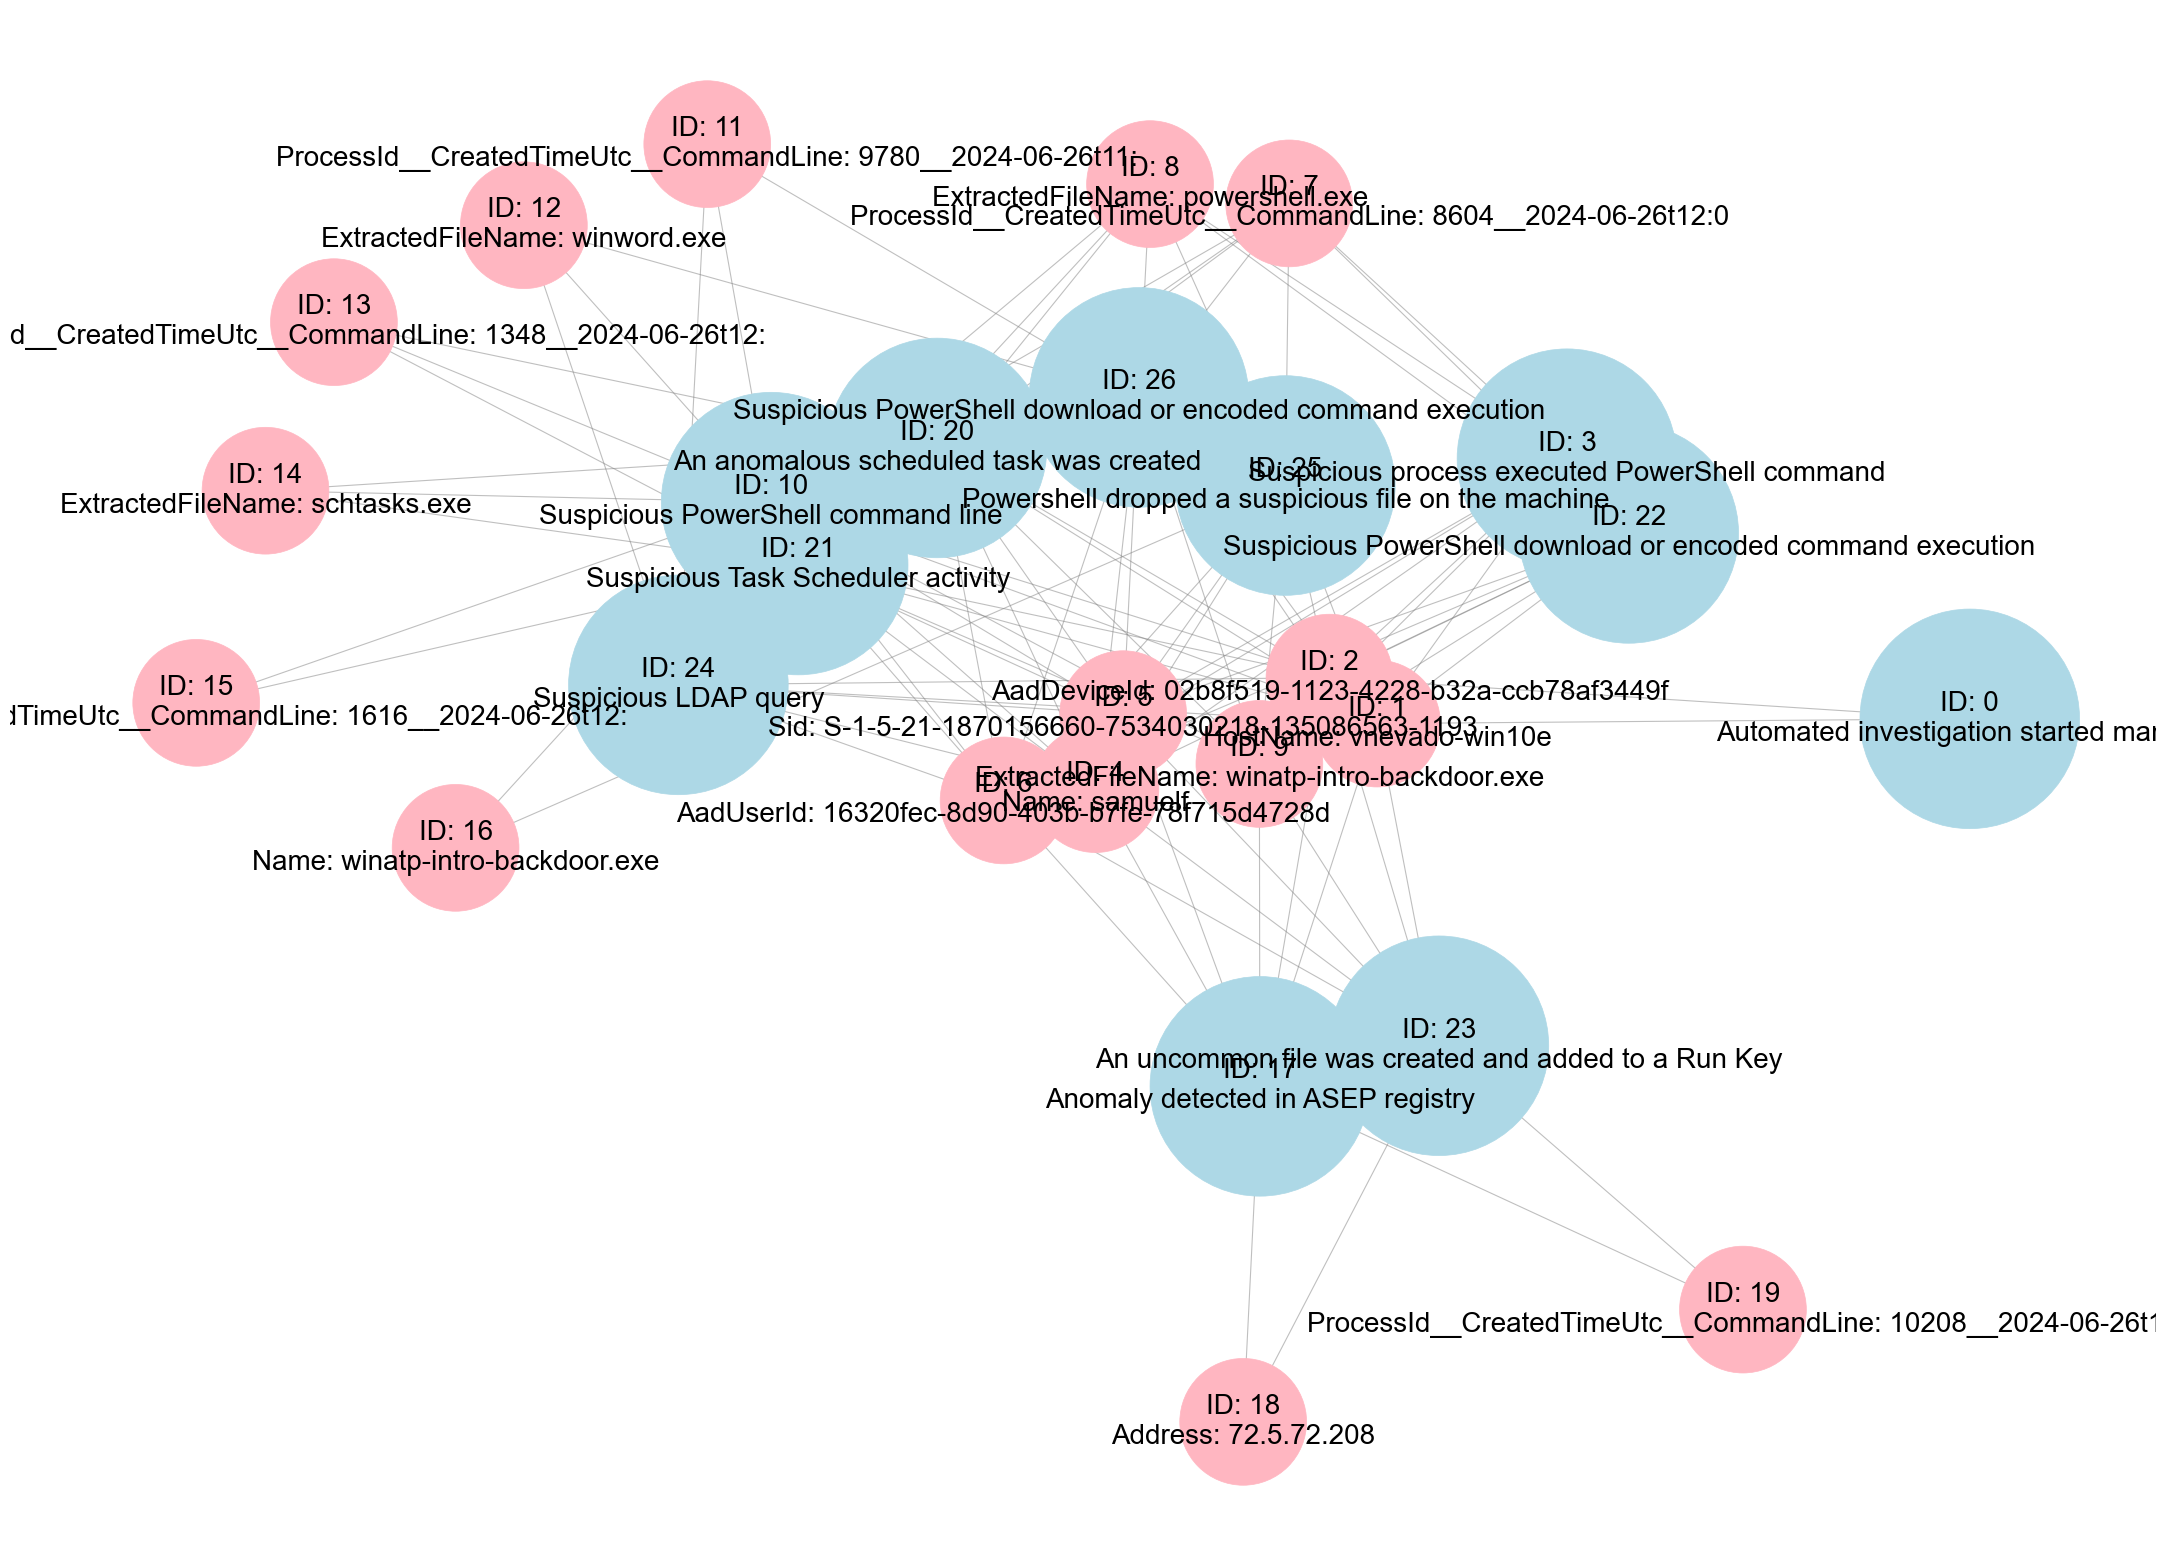

incident_166.graphml 30


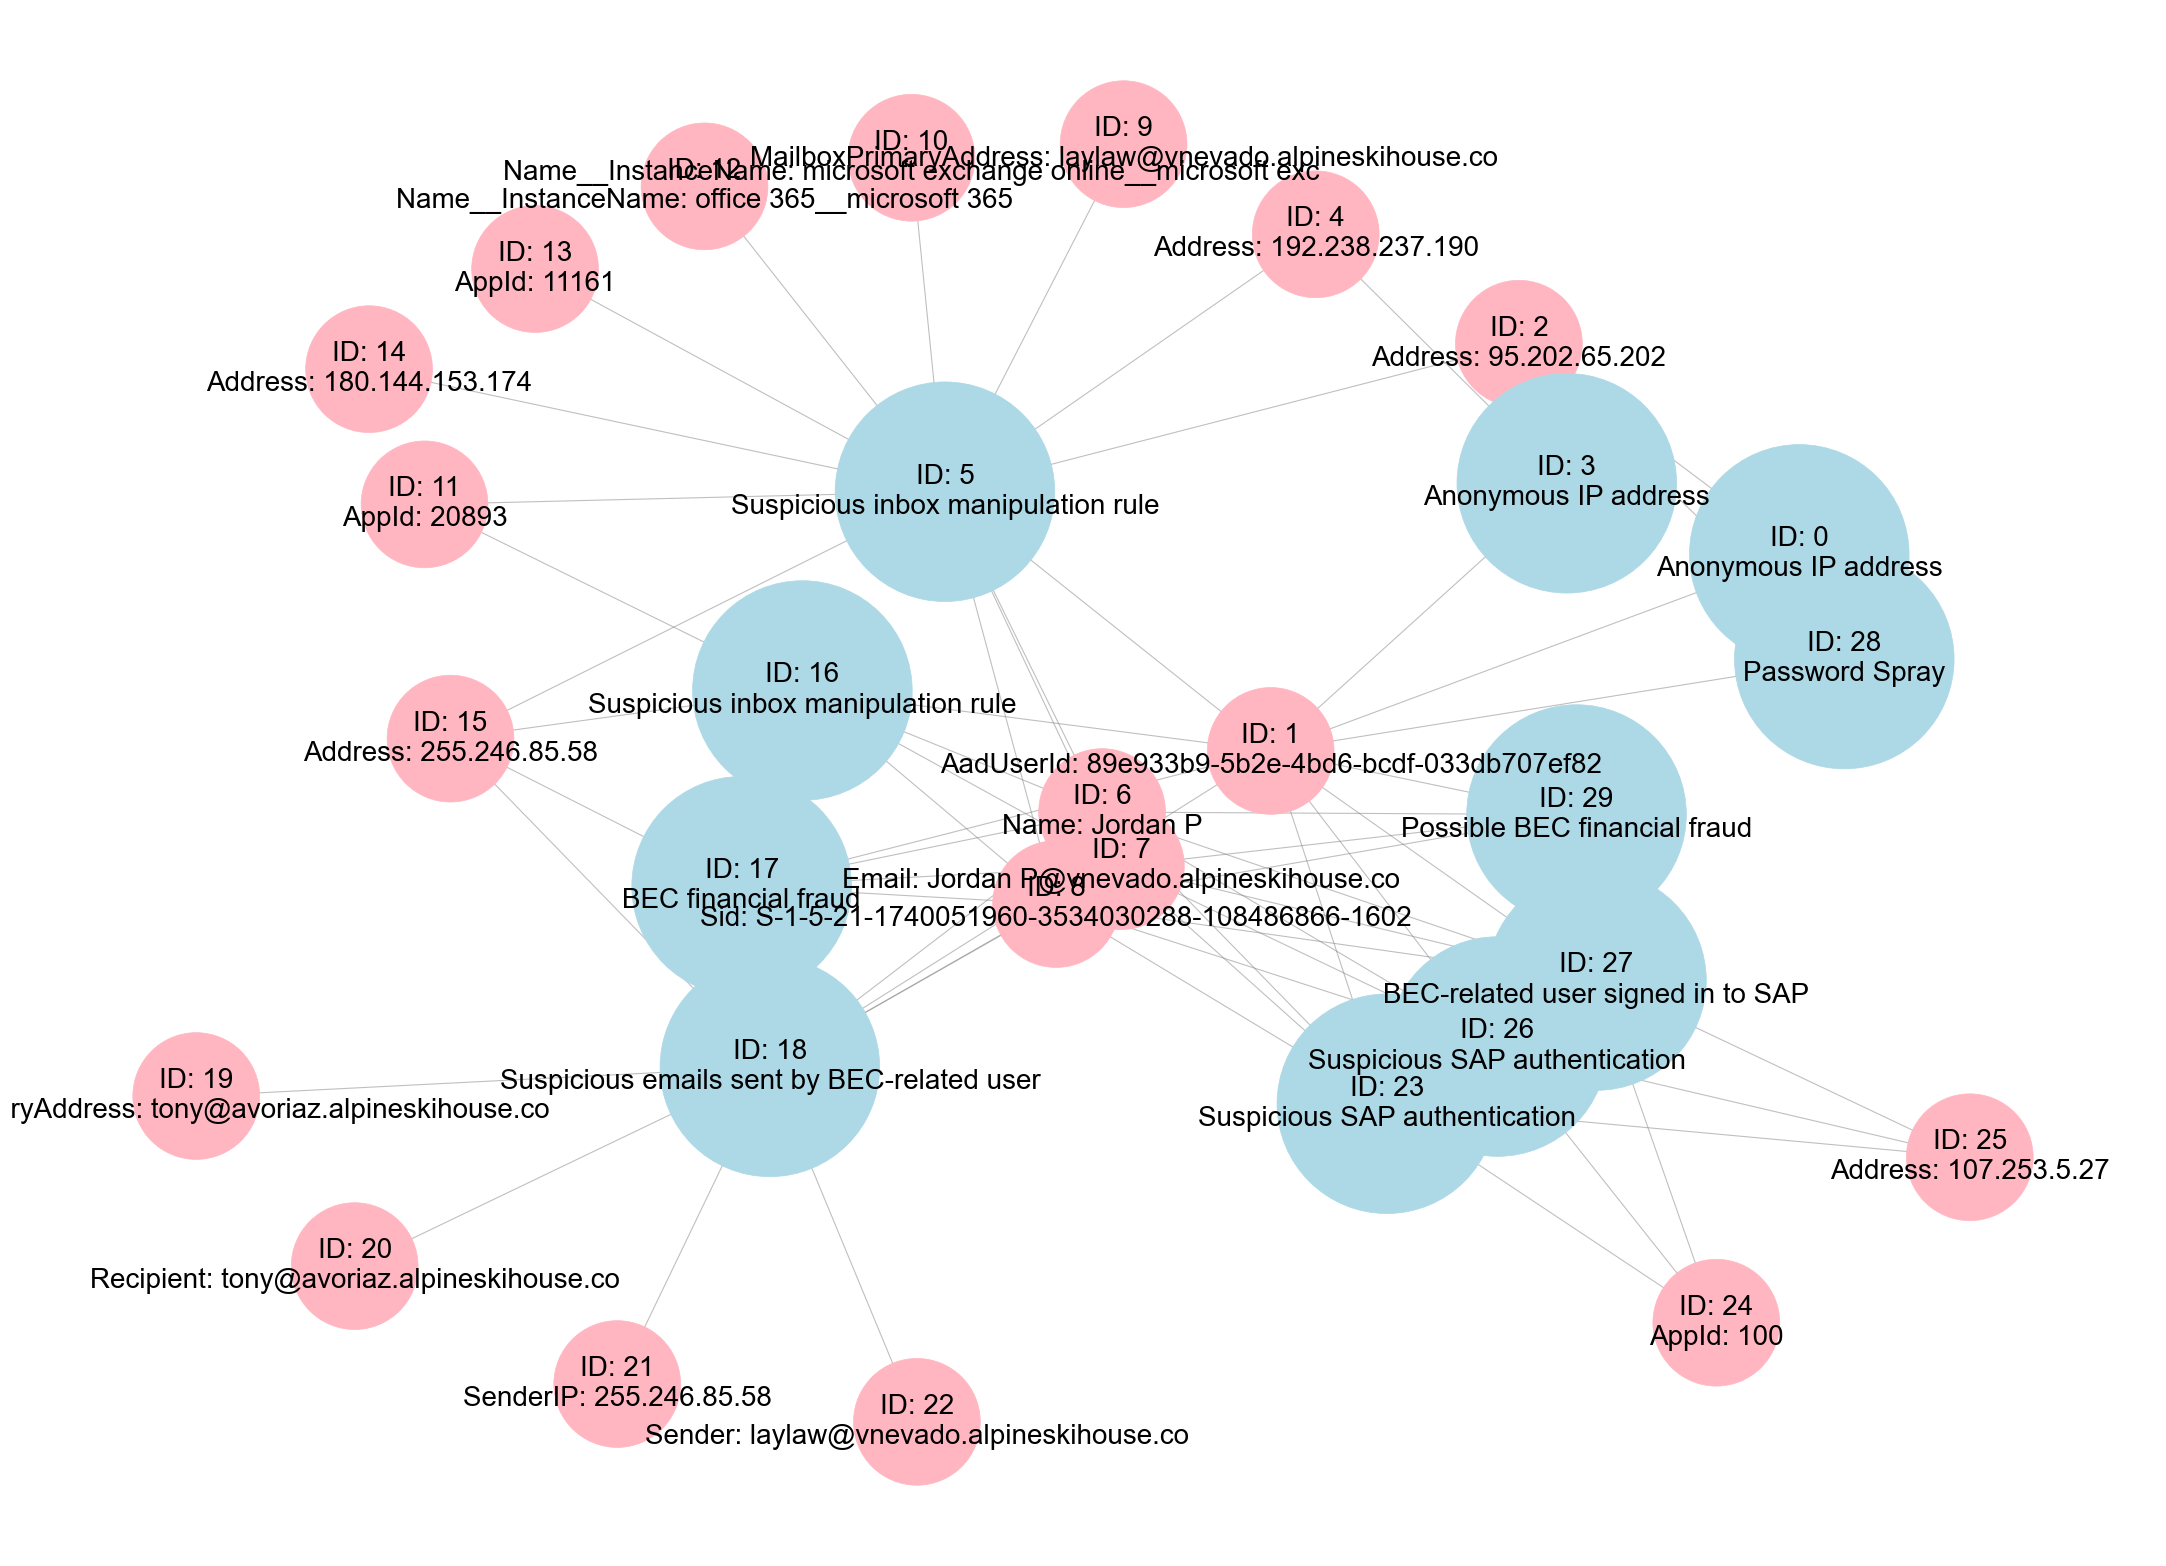

incident_55.graphml 110


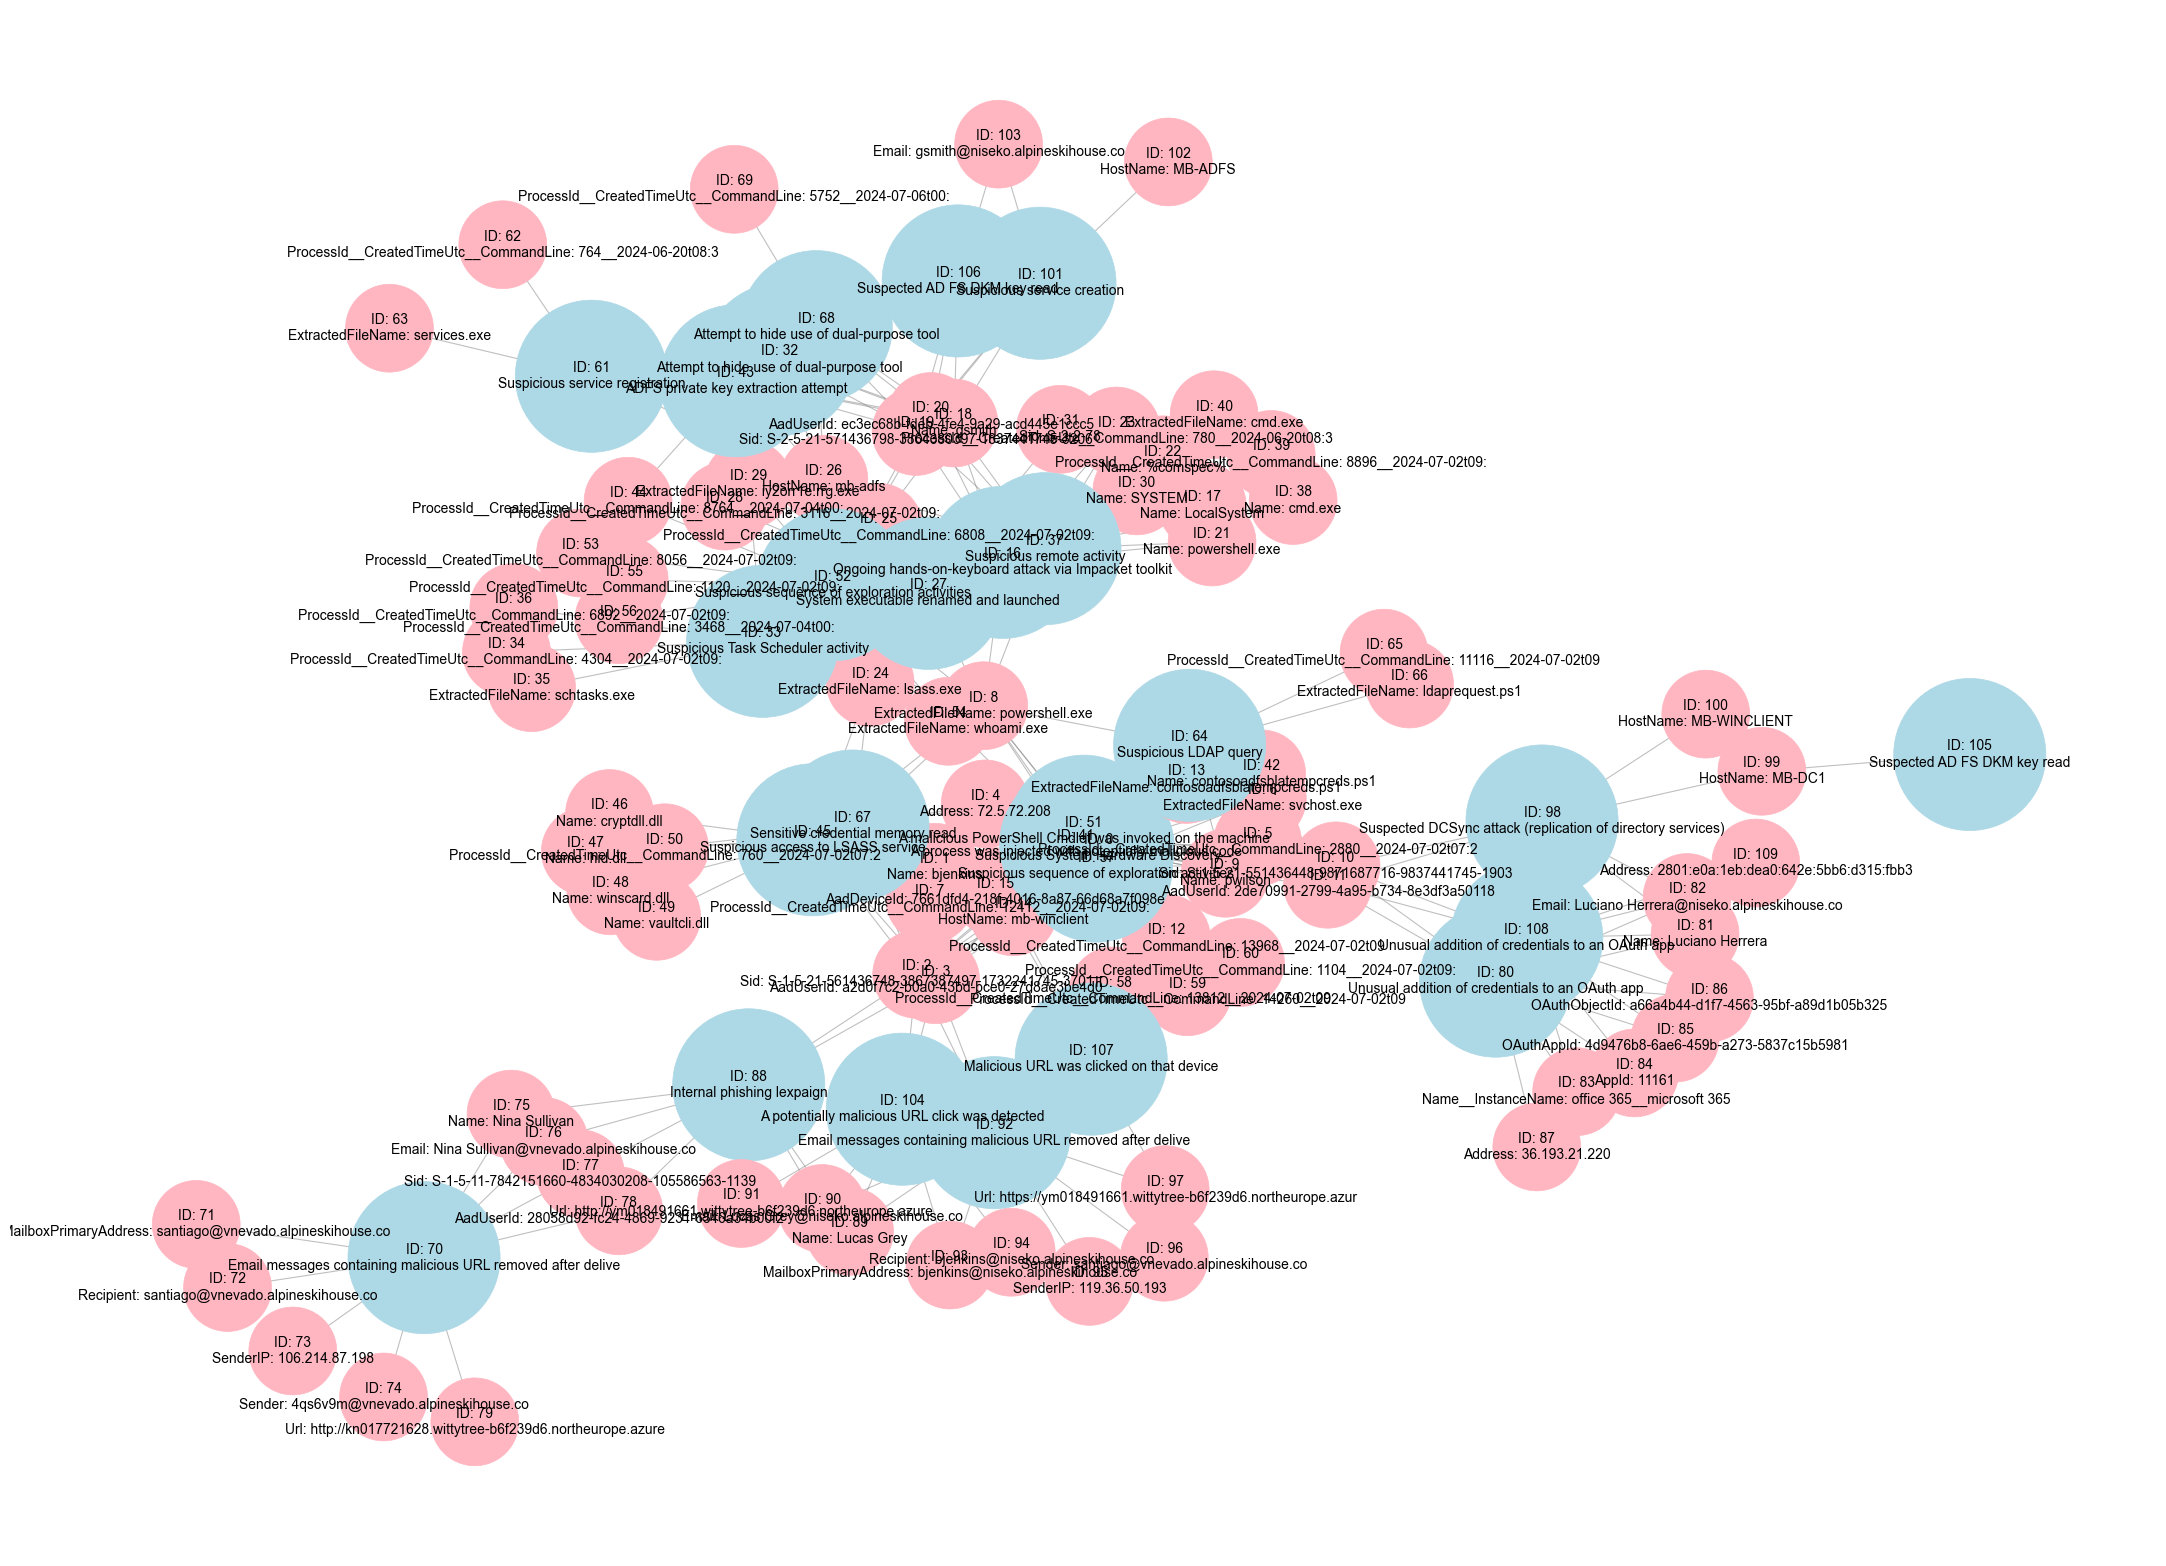

incident_5.graphml 169


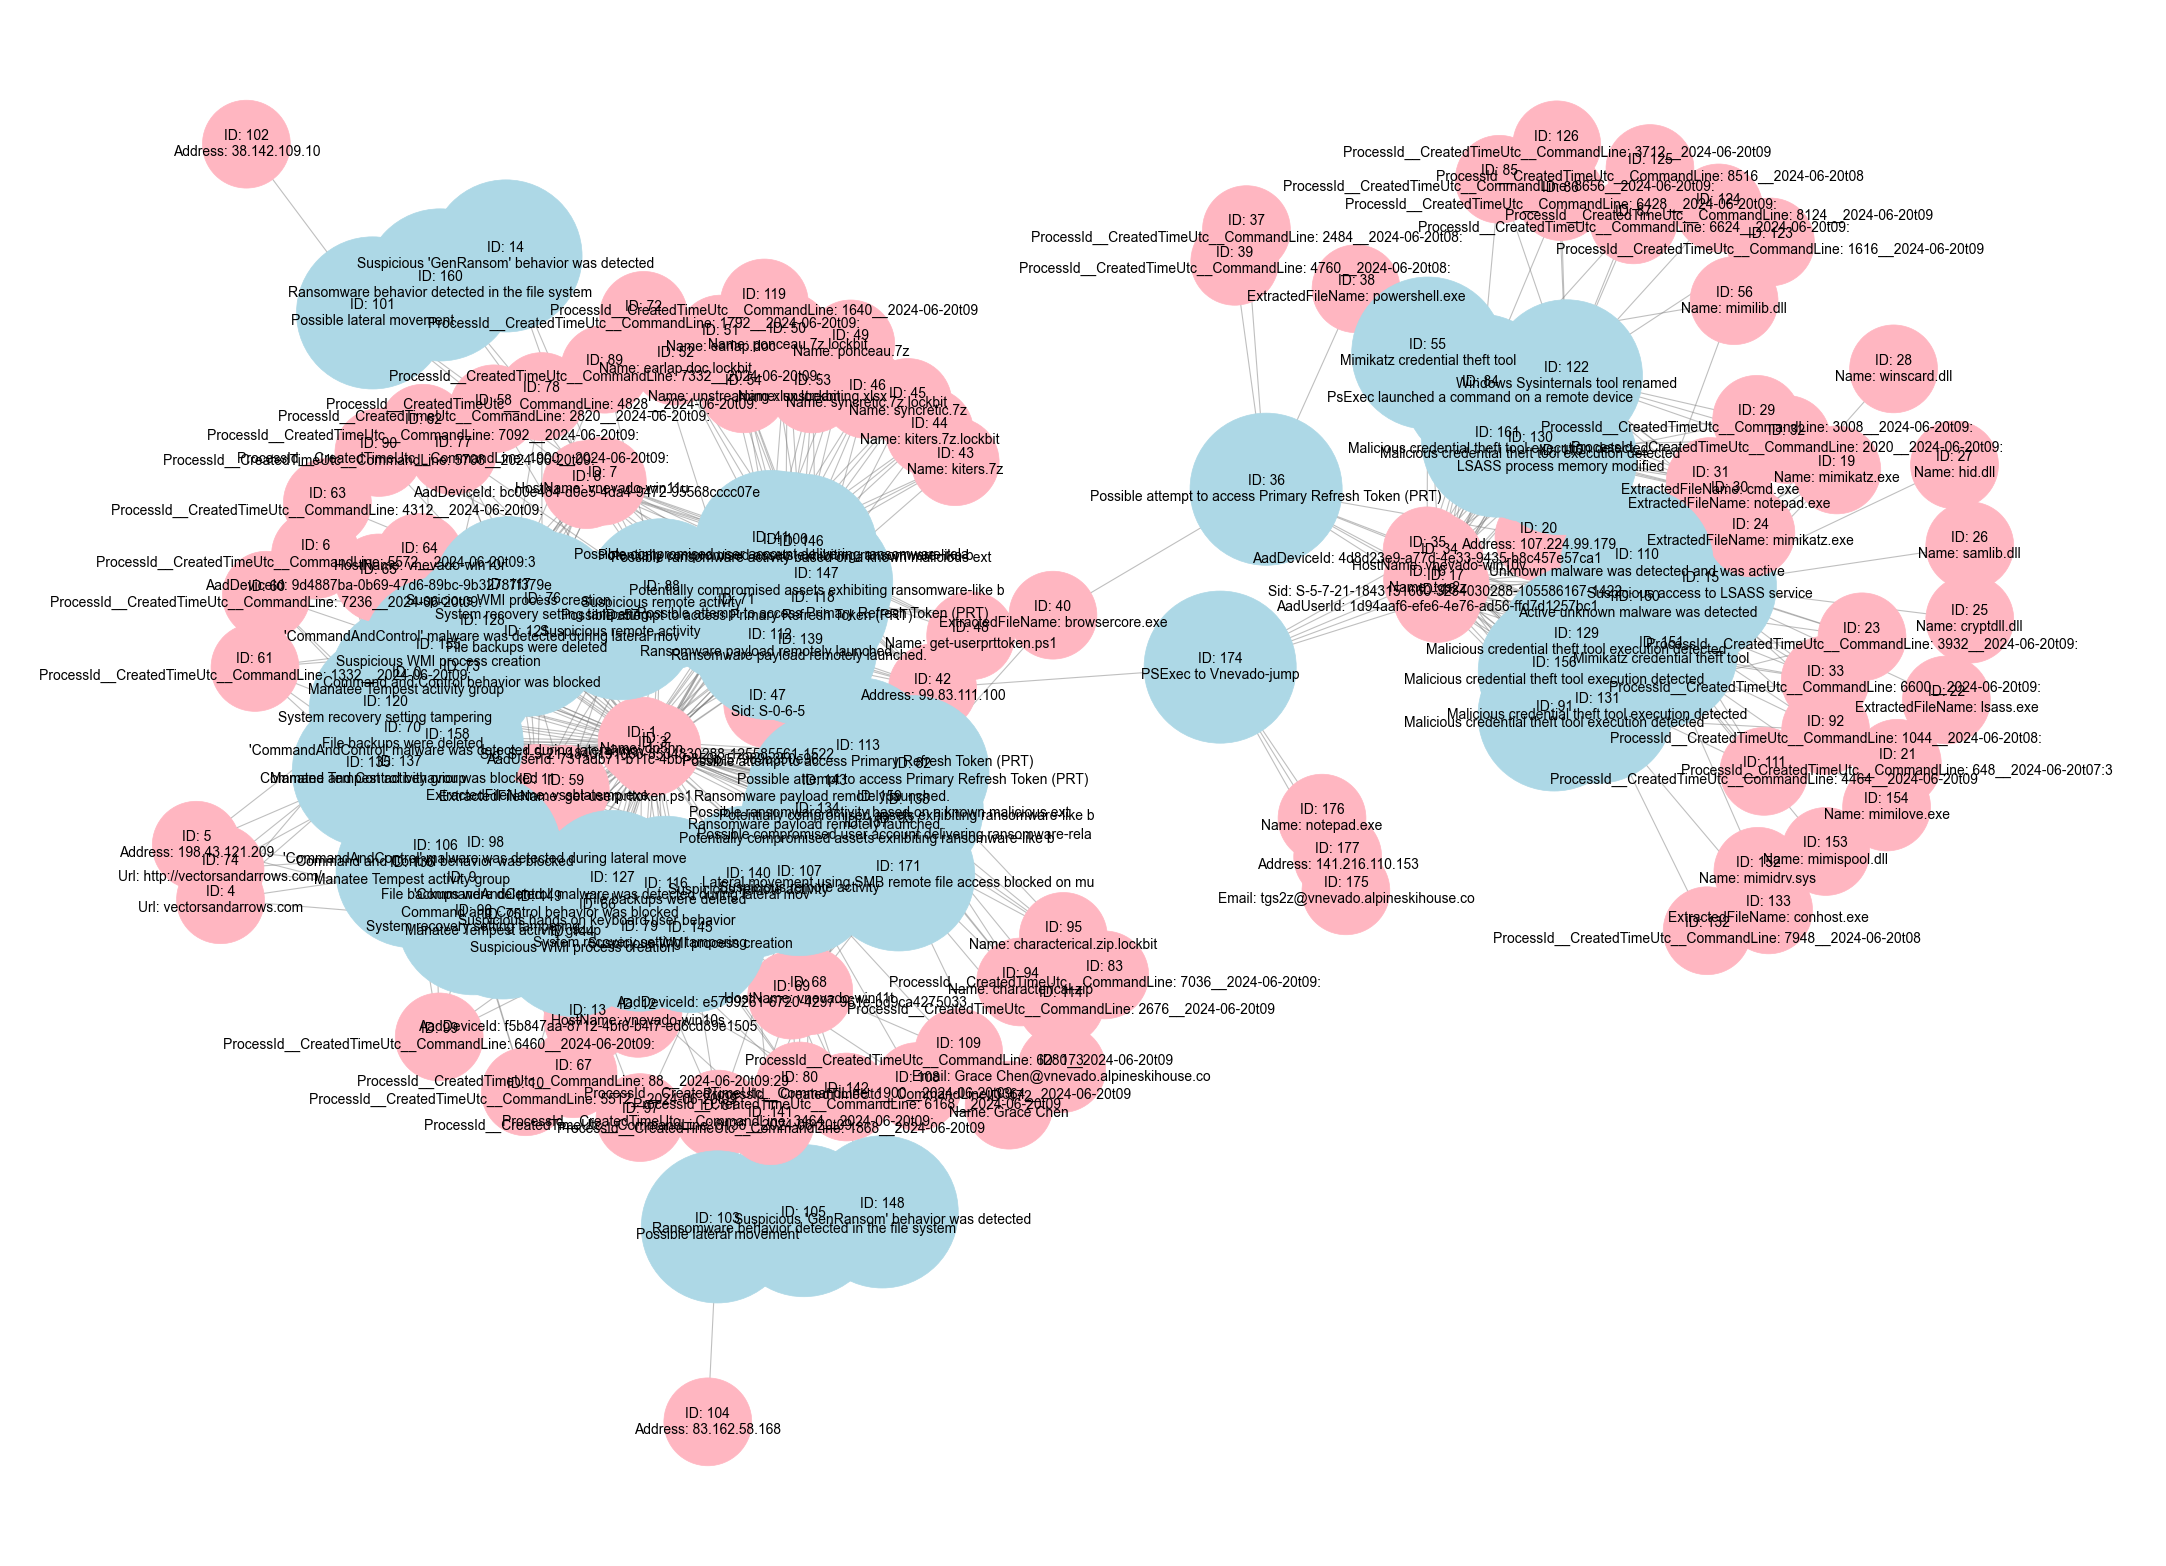

incident_38.graphml 17


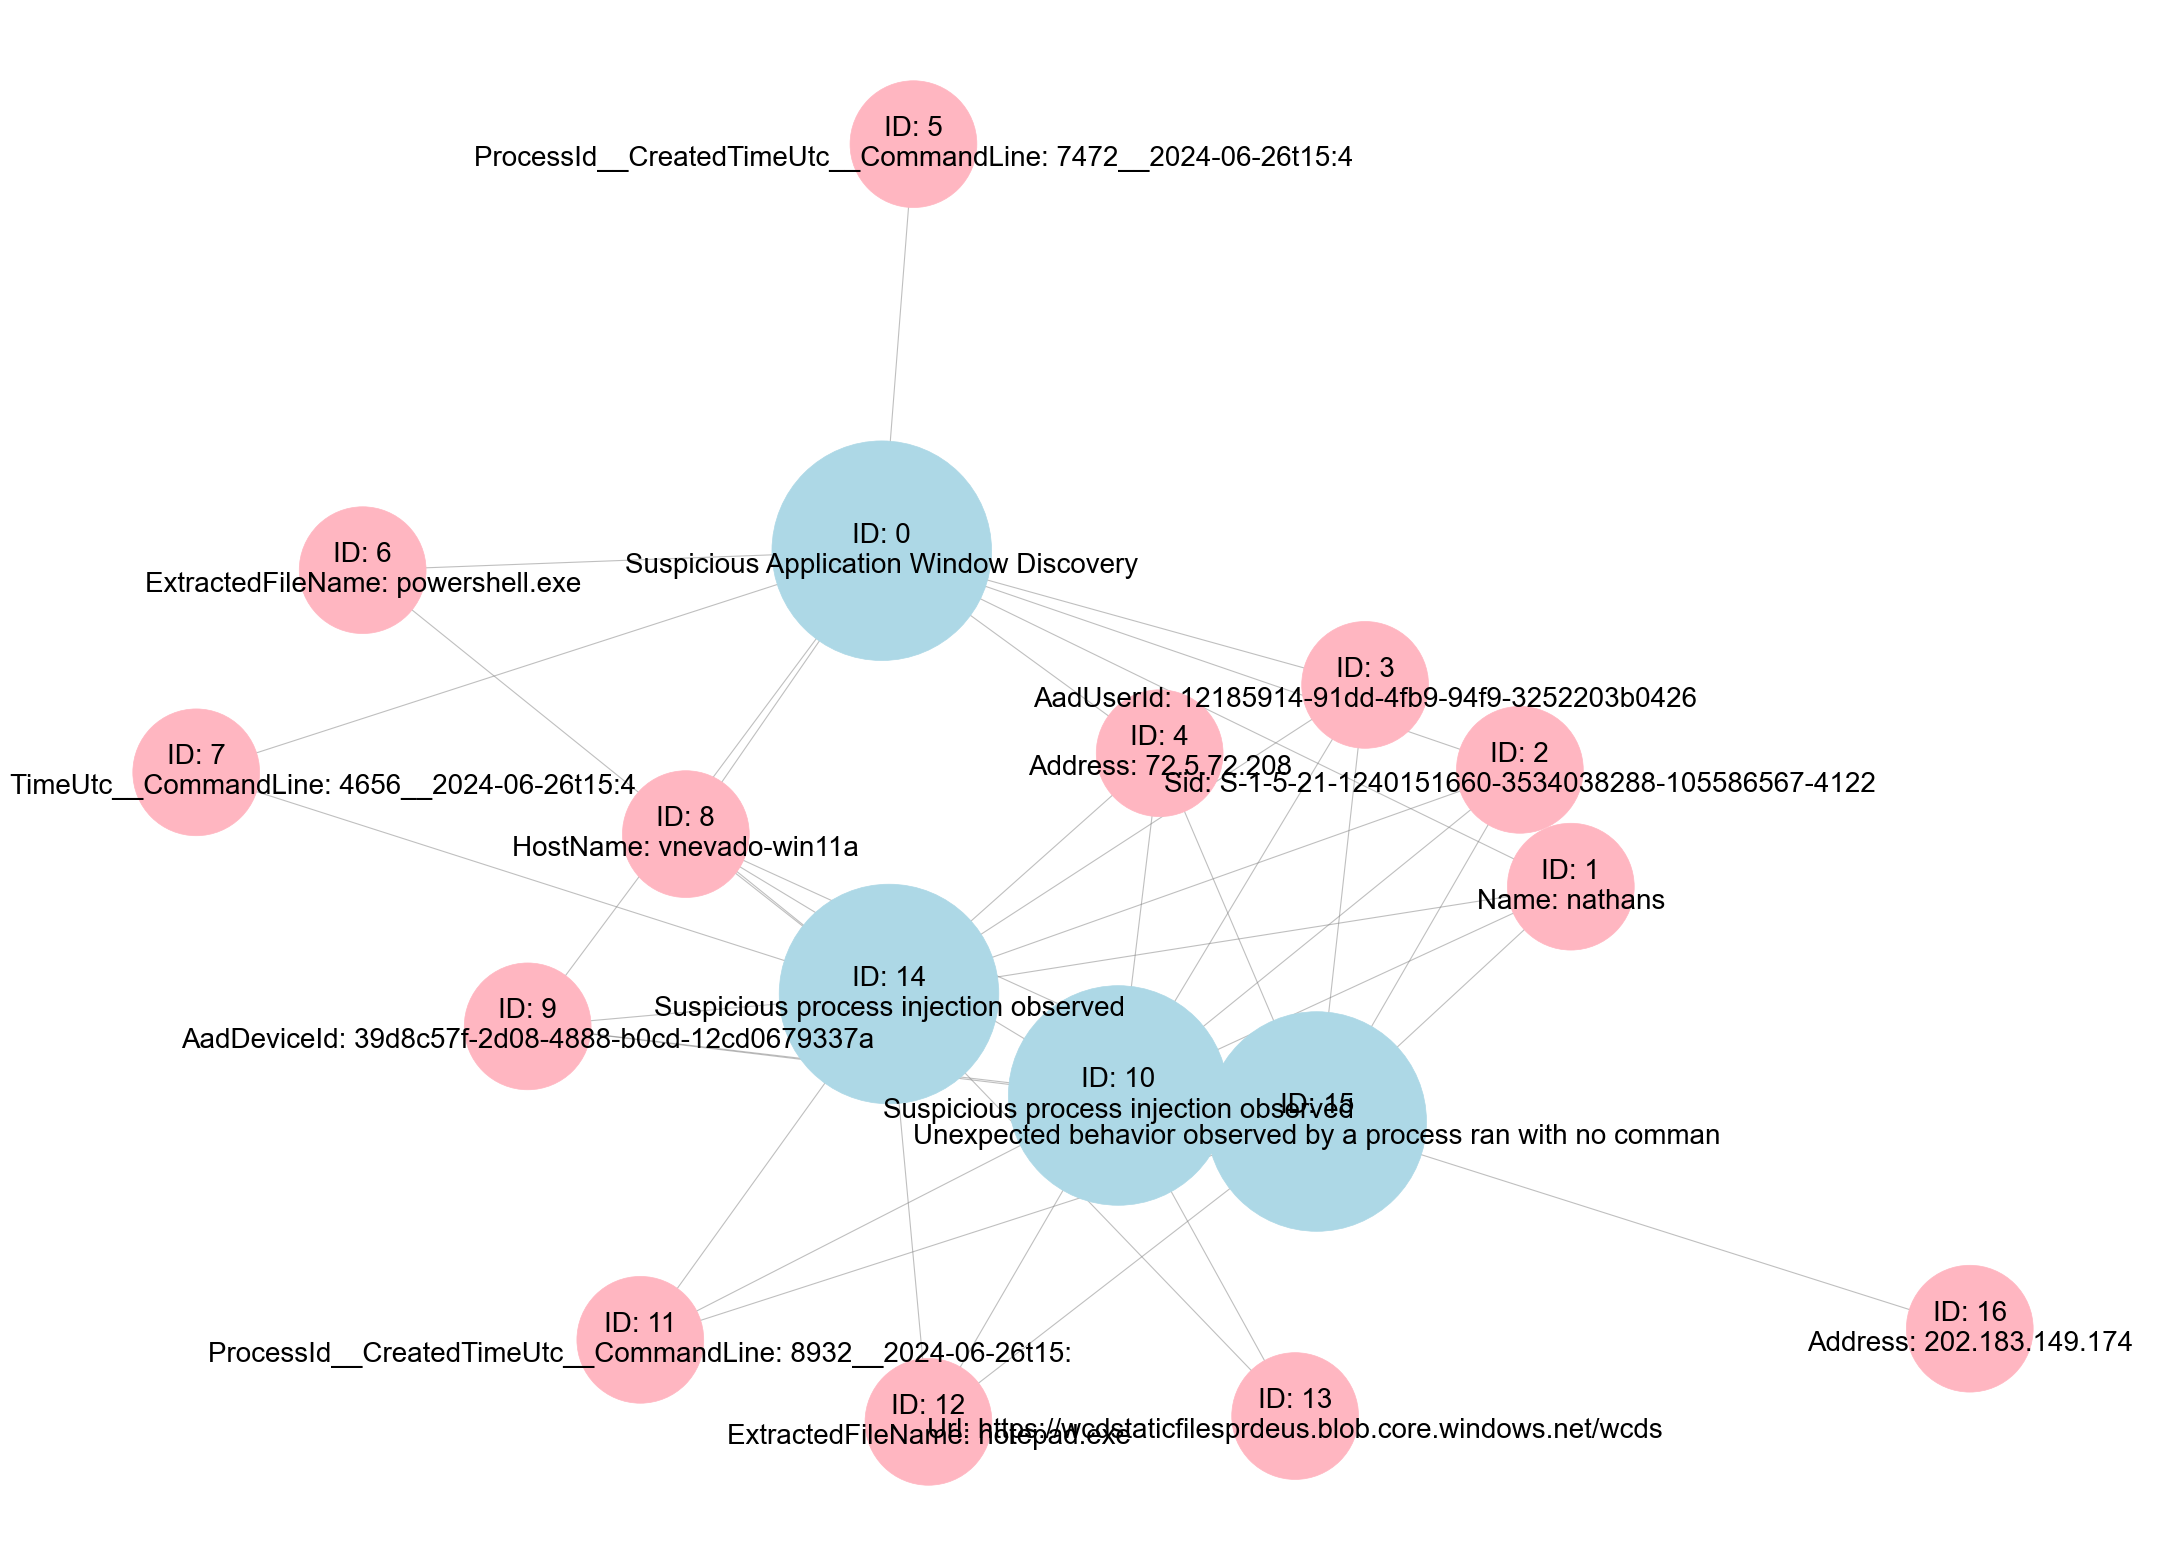

incident_134.graphml 26


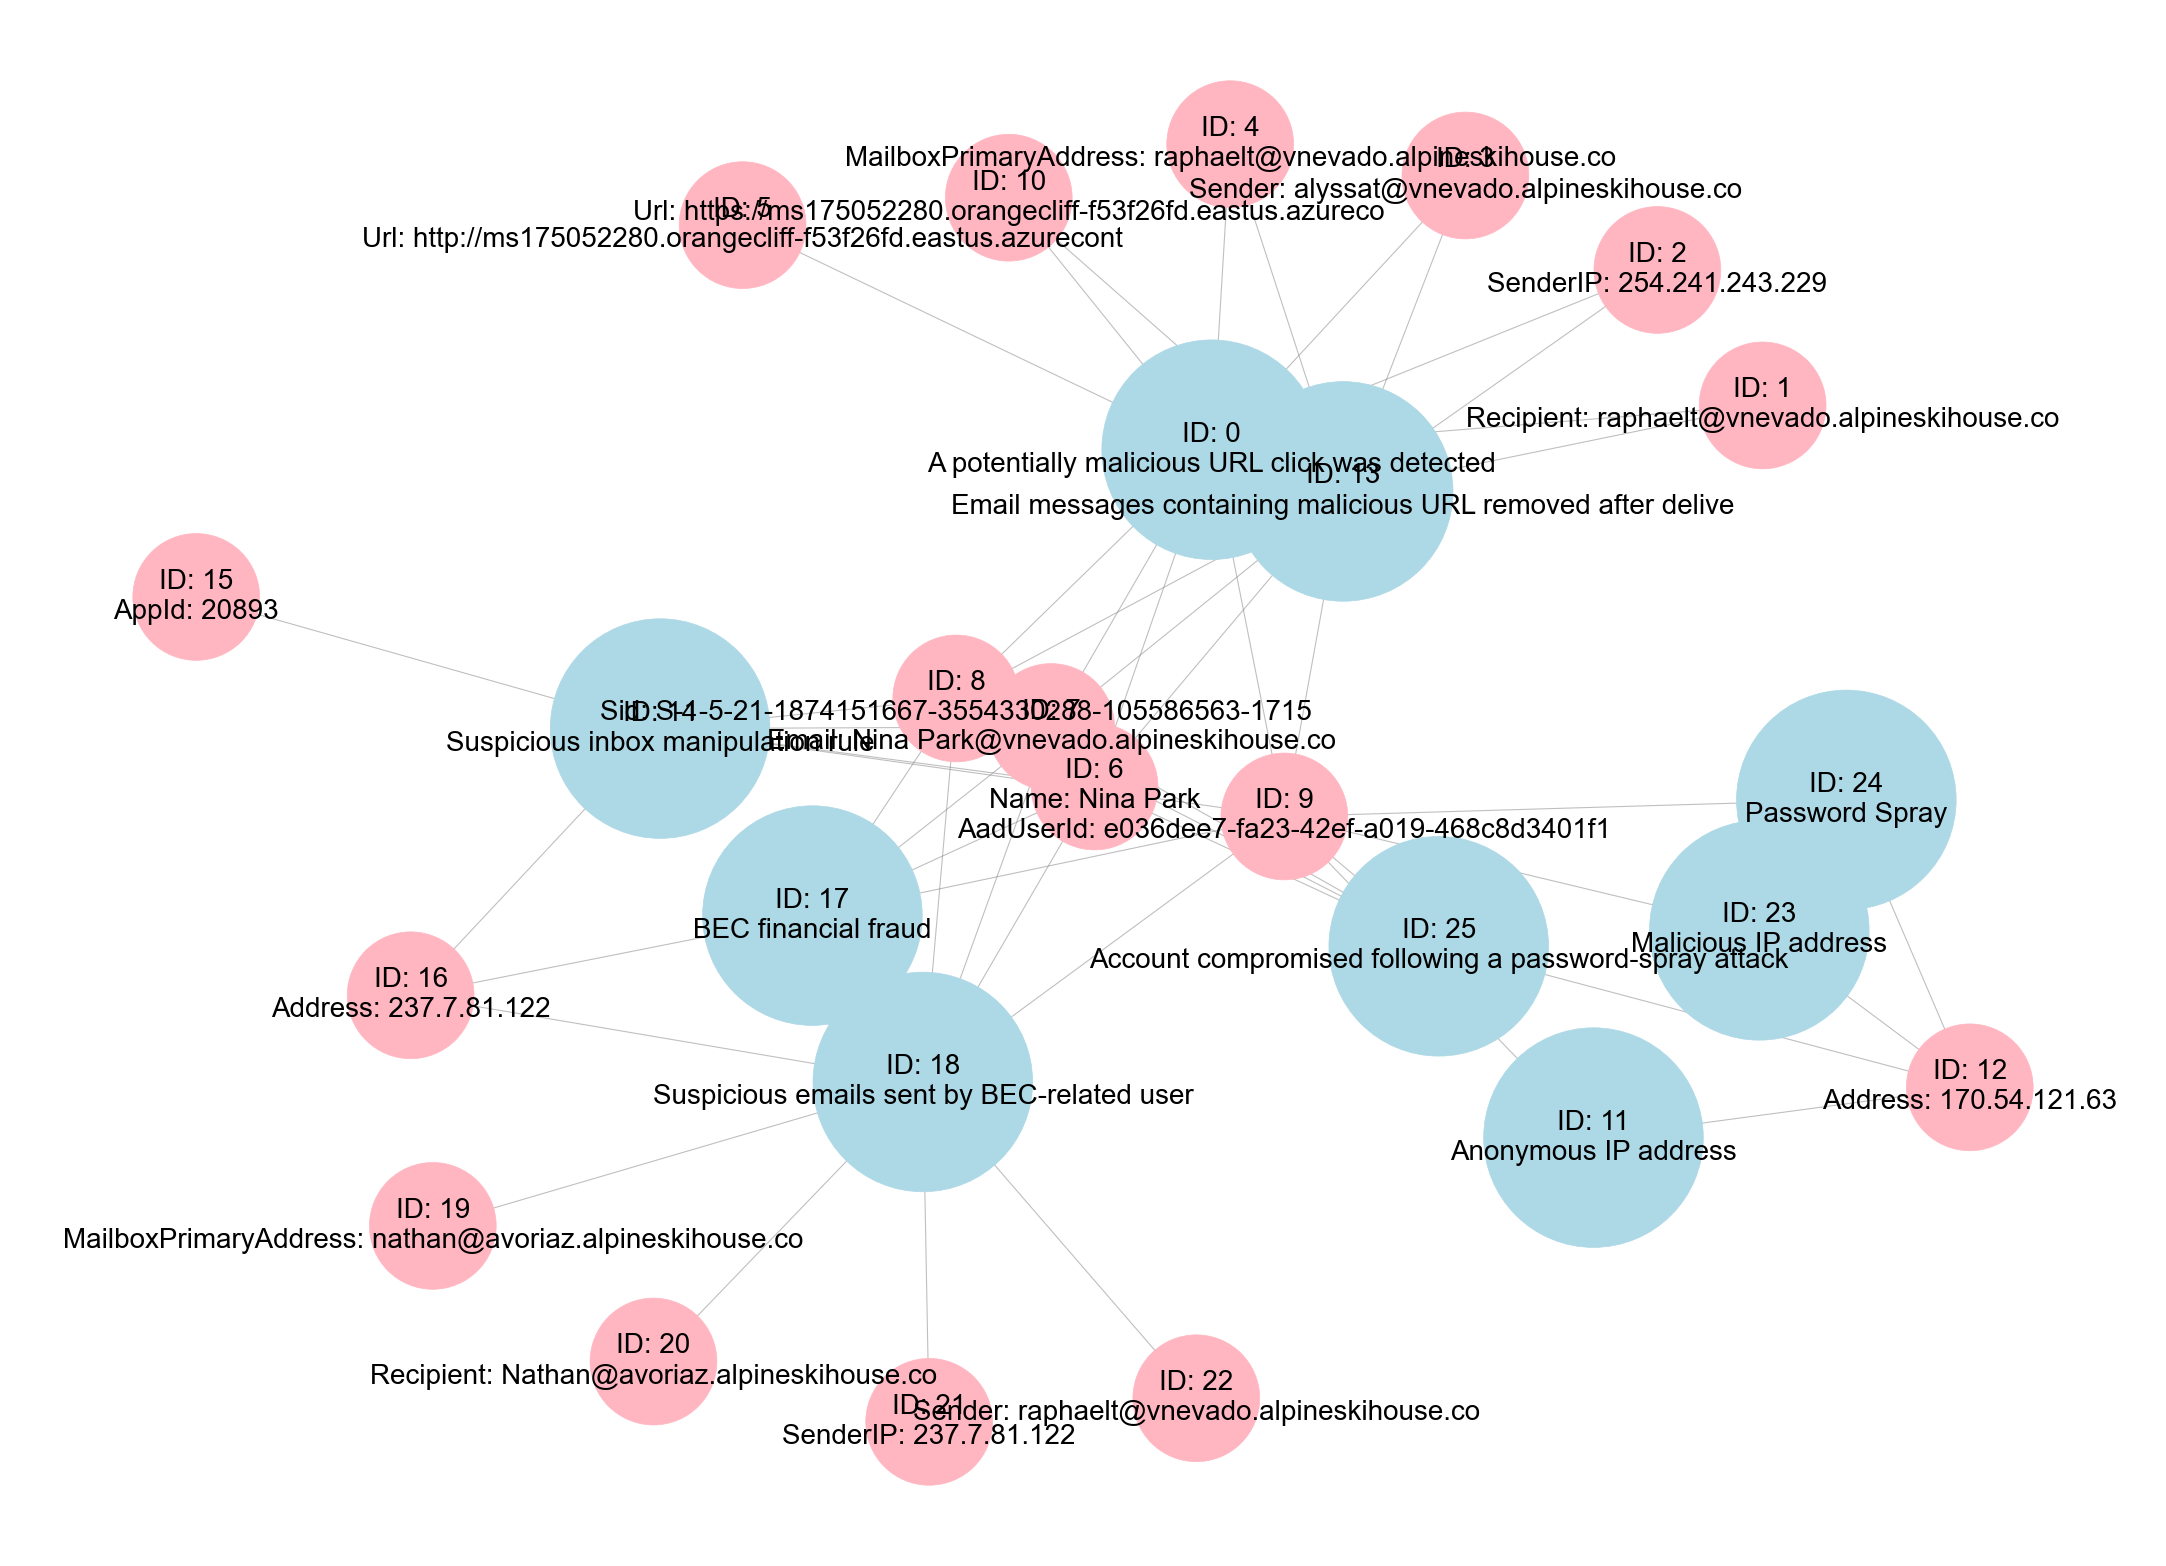

incident_39.graphml 137


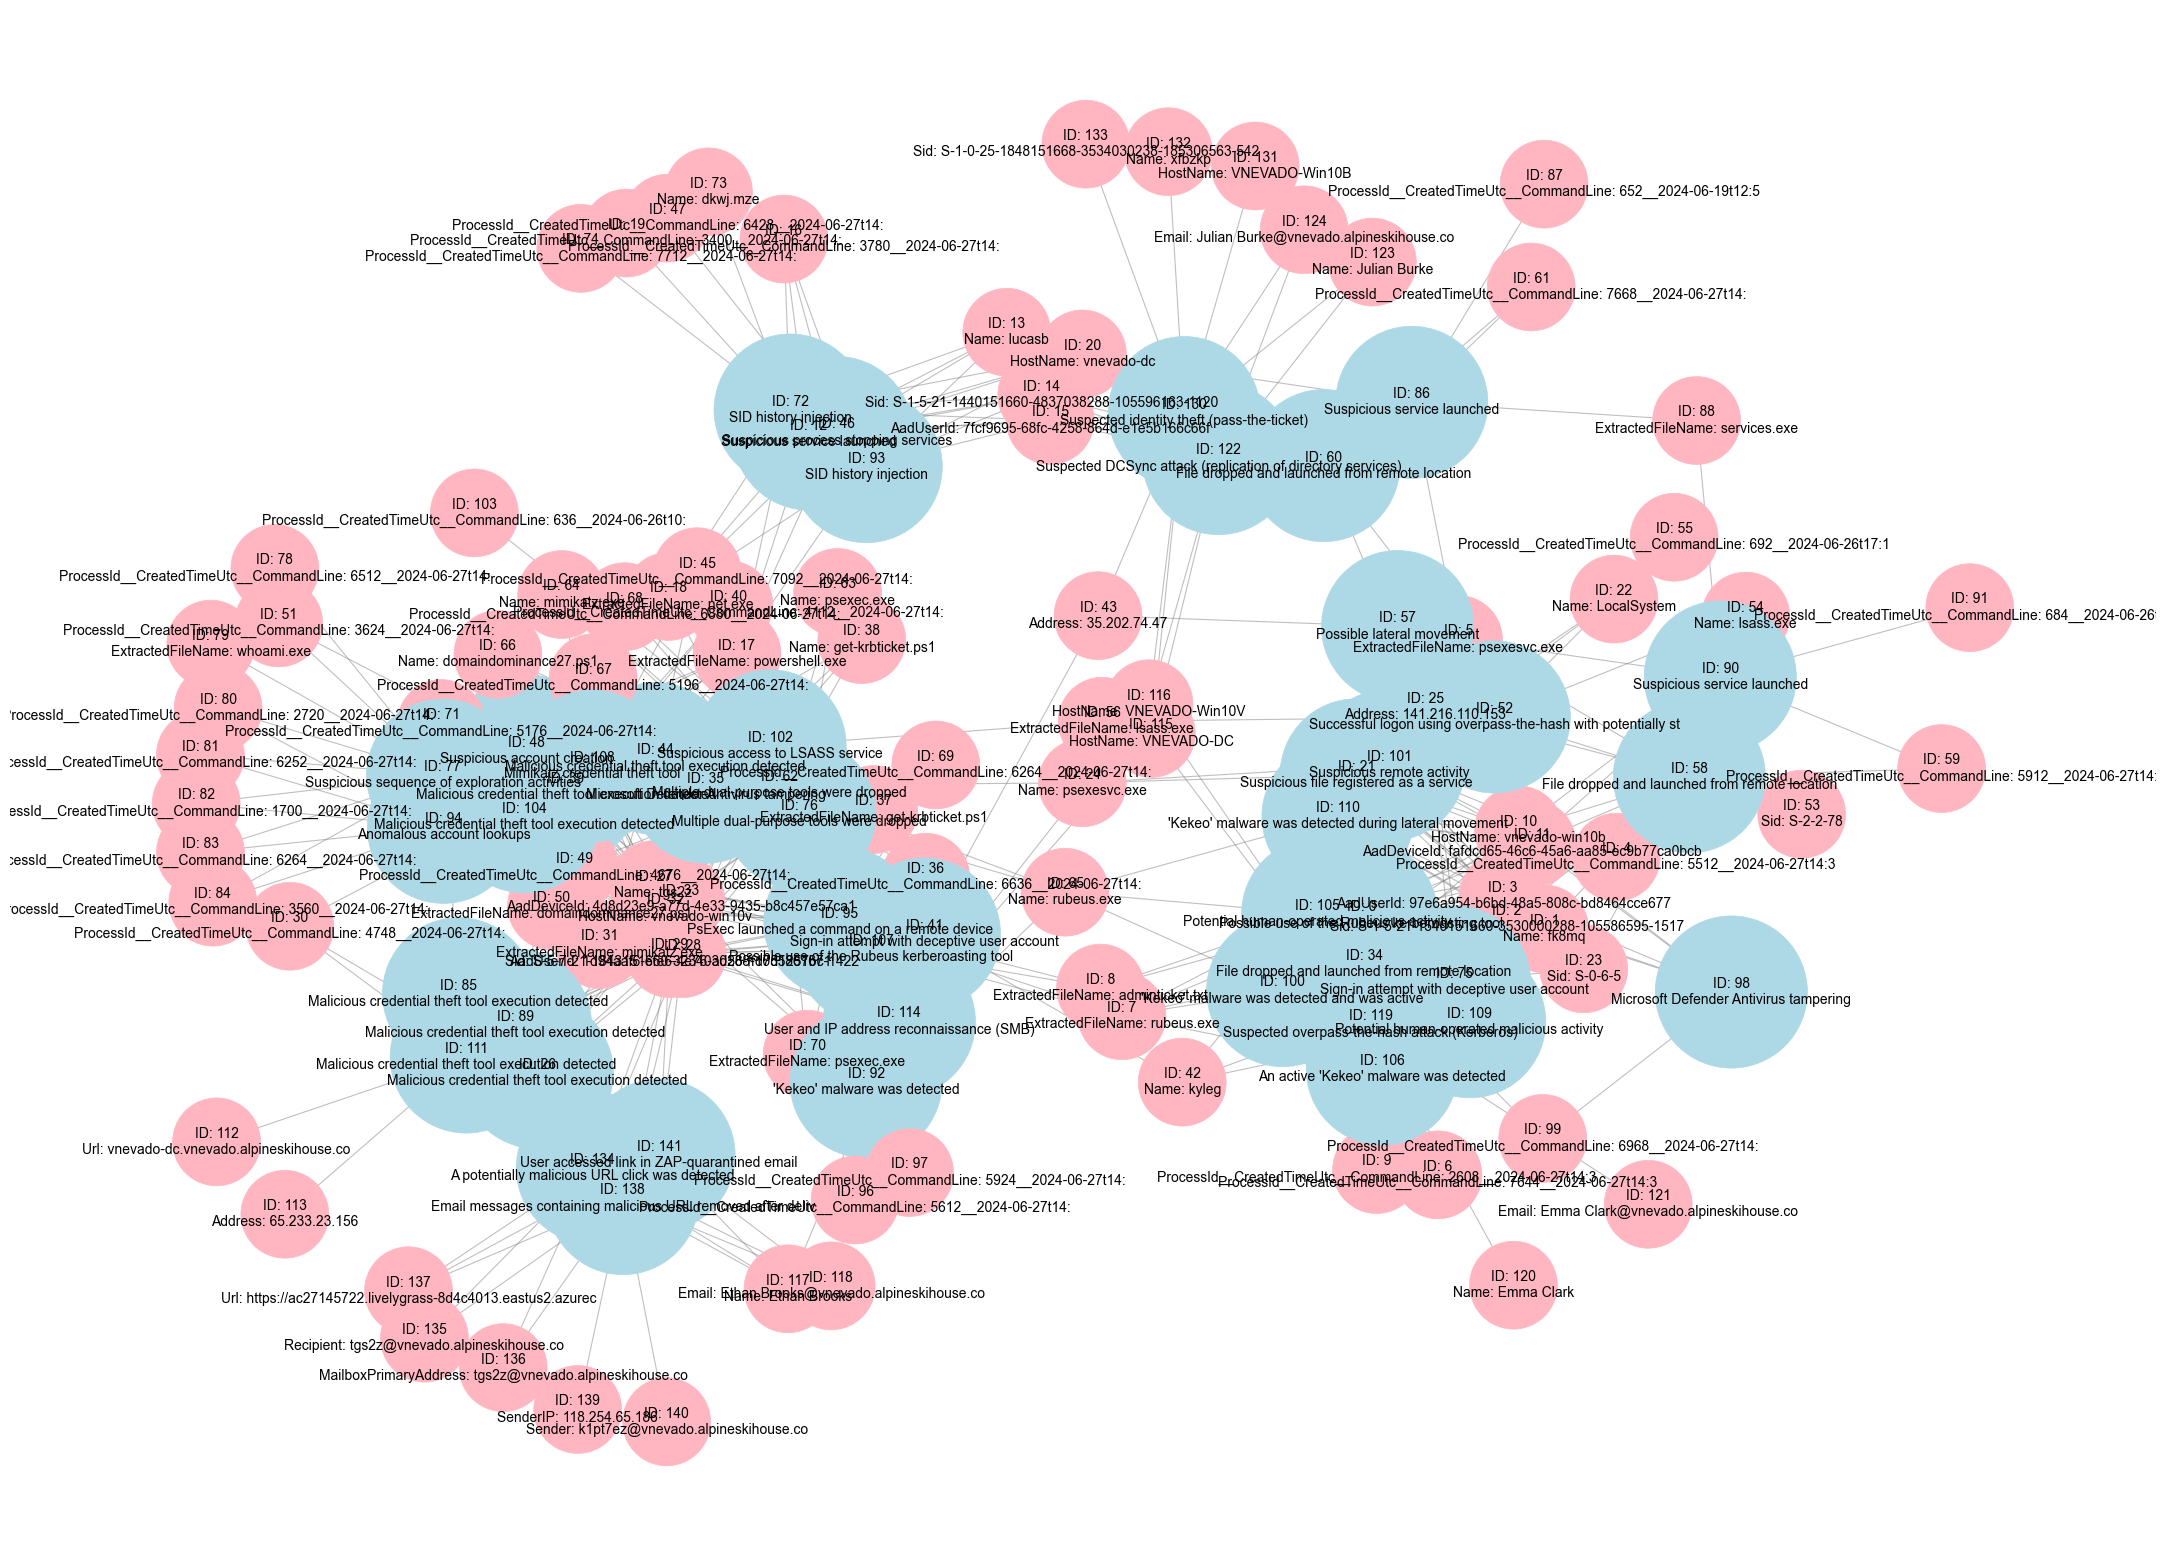

incident_322.graphml 38


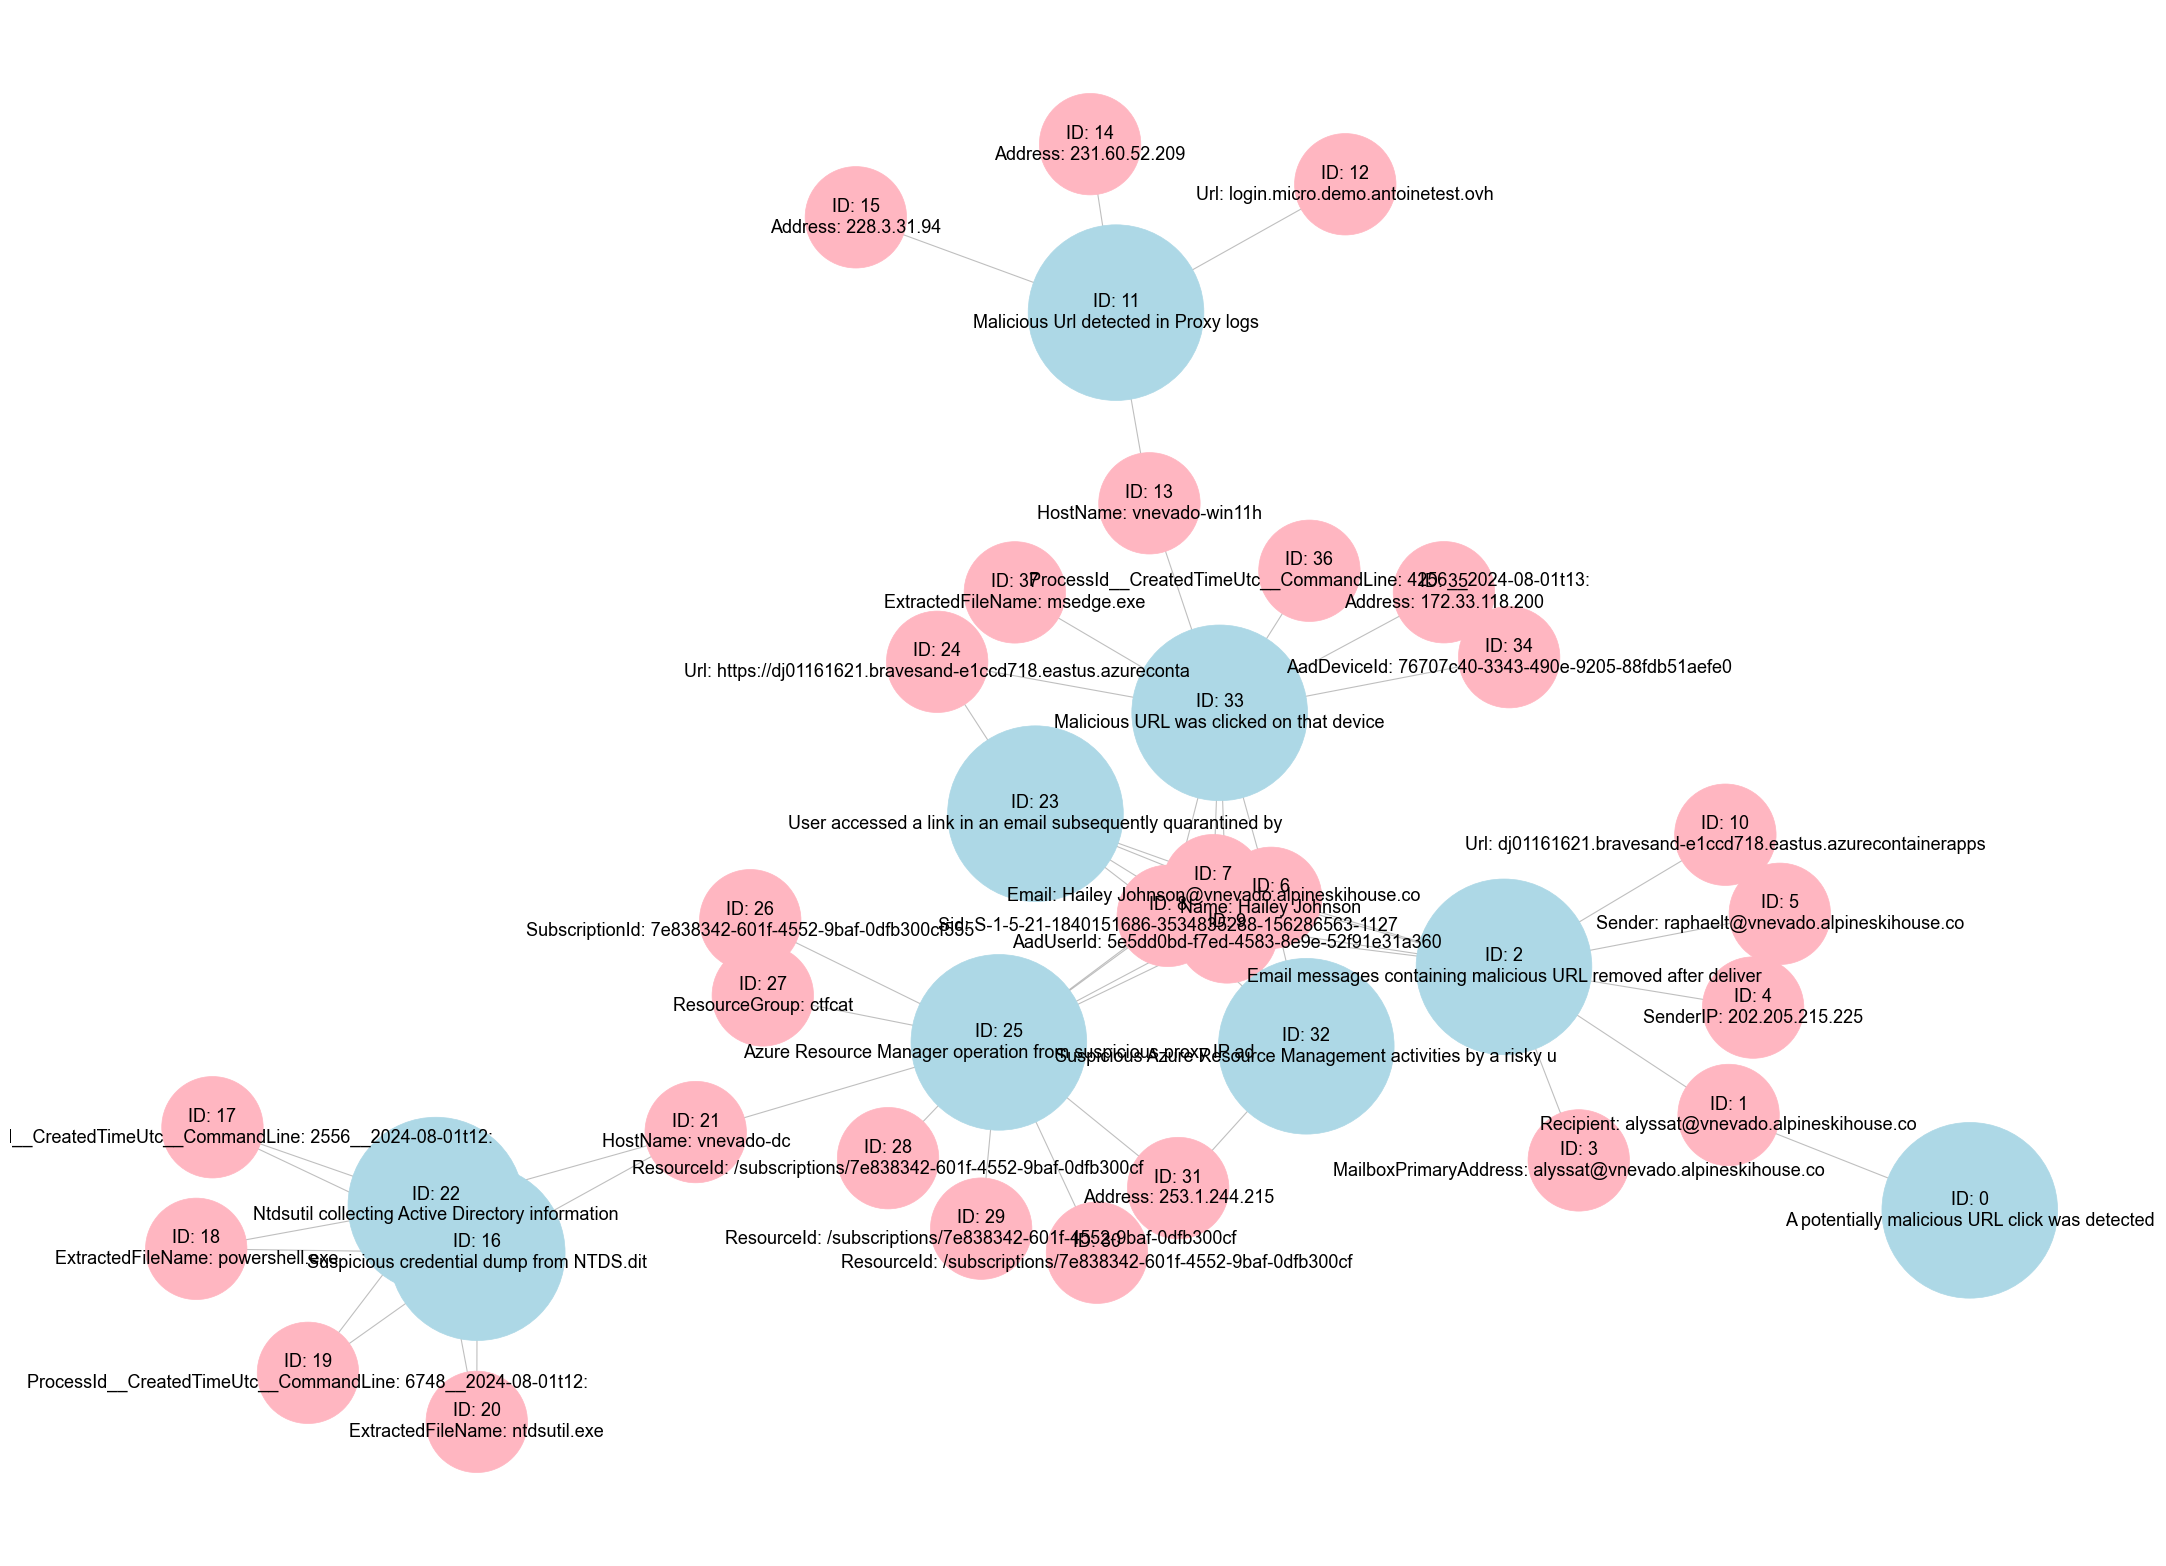

In [44]:
for filename in os.listdir("/Users/kevin/Downloads/SecRL/secgym/qagen/graph_files"):
    if filename.endswith(".graphml"):
        alert_graph = AlertGraph()
        alert_graph.load_graph_from_graphml(filepath=f"/Users/kevin/Downloads/SecRL/secgym/qagen/graph_files/{filename}")
        print(filename, len(alert_graph.graph.nodes))
        # alert_graph.plot_custom_graph()
        fig_sizes = {
            "incident_34.graphml": (22, 16),
            "incident_5.graphml": (22, 16),
            "incident_38.graphml": (22, 16),
            "incident_134.graphml": (22, 16),
            "incident_166.graphml": (22, 16),
            "incident_322.graphml": (22, 16),
            "incident_55.graphml": (22, 16),
            "incident_39.graphml": (22, 16),
            # "incident_322_qa_incident_o1-ga_c42.graphml": (22, 22),
        }
        font_sizes = {
            "incident_34.graphml": 15+5,
            "incident_5.graphml": 10,
            "incident_38.graphml": 15+5,
            "incident_134.graphml": 15+5,
            "incident_166.graphml": 15+5,
            "incident_322.graphml": 13,
            "incident_55.graphml": 10,
            "incident_39.graphml": 10,
        }
        base_node_sizes = {
            "incident_34.graphml": 20000 + 5000,
            "incident_5.graphml": 12000,
            "incident_38.graphml": 20000+ 5000,
            "incident_134.graphml": 20000+ 5000,
            "incident_166.graphml": 20000+ 5000,
            "incident_322.graphml": 16000,
            "incident_55.graphml": 12000,
            "incident_39.graphml": 12000,
        }
        plot_graph(
            alert_graph.graph,
            font_size=font_sizes.get(filename, 10),  # Use default font size if not specified
            layout='kamada_kawai',          # or 'kamada_kawai', 'spectral', etc.
            base_node_size=base_node_sizes.get(filename, 15000),  # Use default size if not specified
            max_line_length=60,
            show_plot=True,
            figsize=fig_sizes.get(filename, (22, 22)),  # Use default size if not specified
            save_figure=True,
            file_path=f"./plots/{filename.replace('.graphml', '.pdf')}",  # Save as PDF
        )
        # break


In [42]:
import networkx as nx

def prune_graph_by_question(graph: nx.Graph, question: dict) -> nx.Graph:
    """
    Given a full alert–entity graph and a question dict (with keys
    'shortest_alert_path', 'start_entities', 'end_entities'),
    return a pruned subgraph containing:
      1) All alerts in the shortest_alert_path
      2) All entities directly attached to those alerts
      3) All alerts directly attached to those entities
      4) All entities directly attached to those second‑order alerts
    Everything else is removed.
    """
    # 0) seed sets from the question
    path_alerts   = set(question.get('shortest_alert_path', []))
    start_entities = set(question.get('start_entities', []))
    end_entities   = set(question.get('end_entities', []))

    # 1) reserve path alerts
    reserved_alerts = set(path_alerts)

    # 2) reserve entities attached to path alerts
    reserved_entities = set(start_entities) | set(end_entities)
    for a in path_alerts:
        for nbr in graph.neighbors(a):
            if graph.nodes[nbr].get('type') == 'entity':
                reserved_entities.add(nbr)

    # 3) reserve alerts attached to those entities
    second_alerts = set()
    for e in list(reserved_entities):
        for nbr in graph.neighbors(e):
            if graph.nodes[nbr].get('type') == 'alert':
                second_alerts.add(nbr)
    reserved_alerts |= second_alerts

    # 4) reserve entities attached to those second-order alerts
    for a in second_alerts:
        for nbr in graph.neighbors(a):
            if graph.nodes[nbr].get('type') == 'entity':
                reserved_entities.add(nbr)

    # 5) build the pruned subgraph
    nodes_to_keep = reserved_alerts | reserved_entities
    pruned = graph.subgraph(nodes_to_keep).copy()
    return pruned

import networkx as nx

def remove_nodes_and_cleanup(graph: nx.Graph, nodes_to_remove: list) -> nx.Graph:
    """
    Remove the specified nodes from the graph, then also remove any nodes
    that become detached (degree zero) as a result.

    Parameters
    ----------
    graph : nx.Graph
        The original graph.
    nodes_to_remove : list[int]
        Node IDs to explicitly remove.

    Returns
    -------
    pruned_graph : nx.Graph
        A copy of the graph with the specified nodes—and any newly detached
        nodes—removed.
    """
    # Work on a copy so we don't mutate the original
    G = graph.copy()

    # 1) Remove the user‑specified nodes
    G.remove_nodes_from(nodes_to_remove)
    print(f"Removed requested nodes: {nodes_to_remove}")

    # 2) Find any nodes that are now detached (degree zero)
    detached = [n for n, deg in G.degree() if deg == 0]
    if detached:
        print(f"Also removing detached nodes: {detached}")
        G.remove_nodes_from(detached)
    else:
        print("No additional detached nodes to remove.")

    return G

new_graph = prune_graph_by_question(alert_graph.graph, selected_questions[0])
new_graph = remove_nodes_and_cleanup(new_graph, [22, 32, 23, 7, 9, 6, 29, 30, 28,34, 36])

labels = plot_graph(
    new_graph,
    # question=selected_questions[2],

    layout='kamada_kawai',          # or 'kamada_kawai', 'spectral', etc.
    base_node_size=14000,     
    max_line_length=60,
    show_plot=True,
    save_figure=False
)
selected_questions[0]

NameError: name 'selected_questions' is not defined

In [ ]:
A malicious URL `https://dj01161621.bravesand-e1ccd718.eastus.azurecontainerapps.io/` was clicked on host `vnevado-win11h`, which triggered a process `msedge.exe`. 
This is part of a broader security incident where multiple alerts, including a suspicious Azure Resource Manager operation from a proxy IP address, were reported.

There is also a suspicious credential dump from NTDS.dit related to this incident. Can you identify the file name of the process used to dump the NTDS.dit?

ID: 8
Sid:S-1-5-21-1840151686-3534835288-156286563-1127
ID: 13
HostName:vnevado-win11h
ID: 16
Suspicious credential dump from NTDS.dit
ID: 20
ExtractedFileName:ntdsutil.exe
ID: 21
HostName:vnevado-dc
ID: 24
Url:https://dj01161621.bravesand-e1ccd718.eastus.azurecontai
ID: 25
Azure Resource Manager operation from suspicious proxy IP ad
ID: 33
Malicious URL was clicked on that device
ID: 35
Address:172.33.118.200
ID: 37
ExtractedFileName:msedge.exe


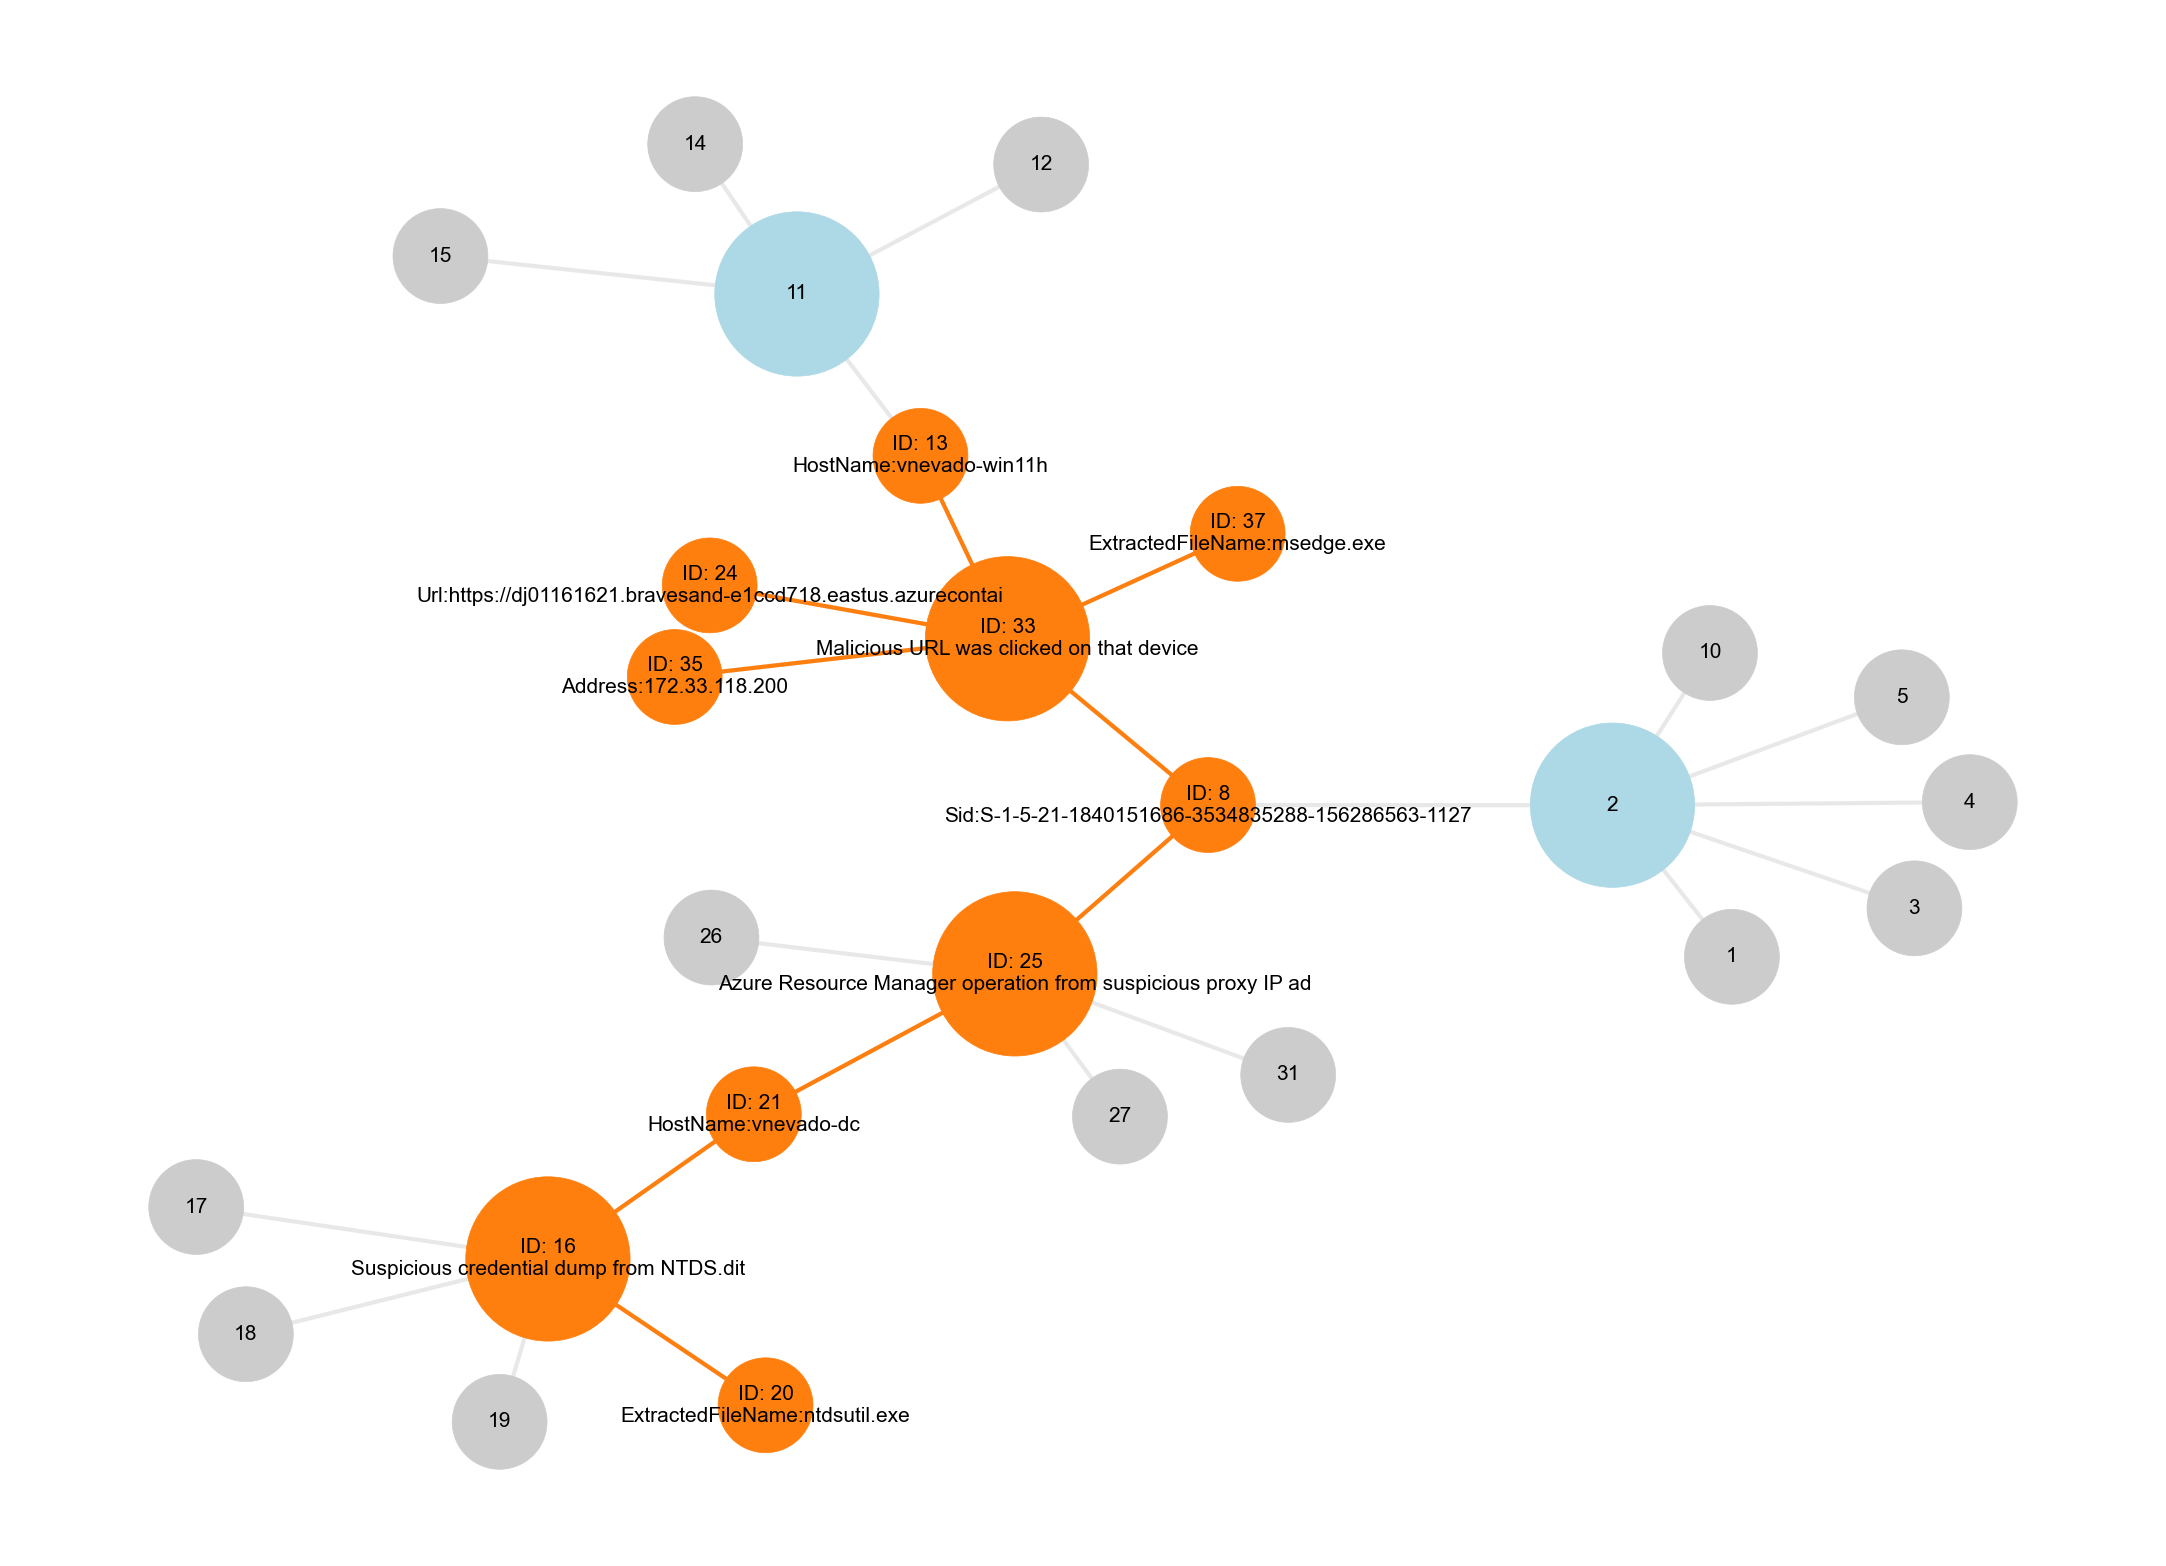

{'context': 'A malicious URL `https://dj01161621.bravesand-e1ccd718.eastus.azurecontainerapps.io/` was clicked on host `vnevado-win11h`, which triggered a process `msedge.exe`. This is part of a broader security incident where multiple alerts, including a suspicious Azure Resource Manager operation from a proxy IP address, were reported. Microsoft Defender for Resource Manager detected a resource management operation from an IP address that is associated with proxy services, such as TOR. Often, such operations can indicate malicious activities.',
 'question': 'There is also a suspicious credential dump from NTDS.dit related to this incident. Can you identify the file name of the process used to dump the NTDS.dit?',
 'answer': 'ntdsutil.exe',
 'solution': ['The user with SID `S-1-5-21-1840151686-3534835288-156286563-1127` clicked on a malicious URL.',
  'There is a suspicious Azure Resource Manager operation from the host `vnevado-dc` using a proxy IP address.',
  'The process `ntdsutil

In [127]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

def plot_graph(
    graph: nx.Graph,
    question: dict = None,
    figsize=(22,16),
    base_node_size=15000,
    max_line_length=80,
    layout: str = 'kamada_kawai',
    show_plot: bool = True,
    save_figure: bool = False,
    file_path: str = None
):
    """
    Plot graph and highlight:
      - question['start_entities'] → green before: now orange
      - question['shortest_alert_path'] → alert‐path nodes & edges
      - question['end_entities']
    Non-highlighted alerts are light blue (big), entities are pink (small).
    Nodes off the path show only their ID.
    """
    sns.set_style("whitegrid")
    sns.set_context("talk")

    # extract highlight sets
    starts = set(question.get('start_entities', [])) if question else set()
    path = list(question.get('shortest_alert_path', [])) if question else []
    ends   = set(question.get('end_entities', [])) if question else set()
    highlight_nodes = starts | set(path) | ends

    # choose layout
    if layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(graph)
    elif layout == 'spectral':
        pos = nx.spectral_layout(graph)
    elif layout == 'shell':
        pos = nx.shell_layout(graph)
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, k=1.0, iterations=300, seed=42)

    # prepare node visuals
    base_colors = {'alert': '#ADD8E6', 'entity': '#cccccc'}
    highlight_color = '#ff7f0e'
    node_colors, node_sizes, labels = [], [], {}

    for node, data in graph.nodes(data=True):
        ntype = data.get('type', 'entity')

        # only full label for highlighted nodes
        if node in highlight_nodes:
            if ntype == 'alert':
                full_label = f"ID: {node}\n{data.get('name','')}"
            else:
                full_label = f"ID: {node}\n{data.get('identifier_fields','')}:{data.get('value','')}"
            label = full_label[: max_line_length + 7]
            # # add \n at halfway point
            # if len(label) > max_line_length:
            #     half = max_line_length // 2
            #     label = label[:half] + '\n' + label[half:]

            # add \n twice to break at 1/3 and 2/3
            # if len(label) > max_line_length:
            #     third = max_line_length // 3
            #     label = label[:third] + '\n' + label[third:2*third] + '\n' + label[2*third:]
            print(label)
        else:
            # off-path nodes show only their ID
            label = str(node)

        labels[node] = label

        # size by type
        size = base_node_size if ntype=='alert' else base_node_size//3
        node_sizes.append(size)

        # color: highlight override, else base by type
        node_colors.append(highlight_color if node in highlight_nodes else base_colors[ntype])

    # draw base edges
    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(graph, pos, edge_color='lightgray', alpha=0.5, width=3)

    # build and draw highlighted edges
    highlight_edges = []
    if len(path) > 1:
        highlight_edges += list(zip(path, path[1:]))
    if path:
        first_alert = path[0]
        for e in starts:
            if graph.has_edge(e, first_alert):
                highlight_edges.append((e, first_alert))
        last_alert = path[-1]
        for e in ends:
            if graph.has_edge(last_alert, e):
                highlight_edges.append((last_alert, e))

    if highlight_edges:
        nx.draw_networkx_edges(
            graph, pos,
            edgelist=highlight_edges,
            edge_color=highlight_color,
            width=3
        )

    # draw nodes & labels
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, linewidths=0.5)
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=15, verticalalignment='center', horizontalalignment='center')

    plt.axis('off')
    plt.tight_layout()

    if save_figure and file_path:
        plt.savefig(file_path, dpi=600)
    if show_plot:
        plt.show()
    else:
        plt.close()
    
    return labels
labels = plot_graph(
    new_graph,
    question=selected_questions[0],

    layout='kamada_kawai',          # or 'kamada_kawai', 'spectral', etc.
    base_node_size=14000,     
    max_line_length=60,
    show_plot=True,
    save_figure=False
)
selected_questions[0]

In [126]:
# labels = {0: 'ID: 0\nA potentially malicious URL click was detected', 1: 'ID: 1\nRecipient:alyssat@vnevado.alpineskihouse.co', 2: 'ID: 2\nEmail messages containing malicious URL removed a', 3: 'ID: 3\nMailboxPrimaryAddress:alyssat@vnevado.alpineskiho', 4: 'ID: 4\nSenderIP:202.205.215.225', 5: 'ID: 5\nSender:raphaelt@vnevado.alpineskihouse.co', 8: 'ID: 8\nSid:S-1-5-21-1840151686-3534835288-156286563-1127', 10: 'ID: 10\nUrl:dj01161621.bravesand-e1ccd718.eastus.azureco', 17: 'ID: 17\nProcessId__CreatedTimeUtc__CommandLine:2556__202', 18: 'ID: 18\nExtractedFileName:powershell.exe', 19: 'ID: 19\nProcessId__CreatedTimeUtc__CommandLine:6748__202', 20: 'ID: 20\nExtractedFileName:ntdsutil.exe', 21: 'ID: 21\nHostName:vnevado-dc', 22: 'ID: 22\nNtdsutil collecting Active Directory information', 23: 'ID: 23\nUser accessed a link in an email subsequently qu', 24: 'ID: 24\nUrl:https://dj01161621.bravesand-e1ccd718.eastus', 25: 'ID: 25\nAzure Resource Manager operation from suspicious', 26: 'ID: 26\nSubscriptionId:7e838342-601f-4552-9baf-0dfb300cf', 27: 'ID: 27\nResourceGroup:ctfcat', 29: 'ID: 29\nResourceId:/subscriptions/7e838342-601f-4552-9ba', 31: 'ID: 31\nAddress:253.1.244.215'}

for k, v in labels.items():
    print(f"Node: {k}, Label: {v}")

Node: 0, Label: ID: 0
A potentially malicious URL click was detected
Node: 1, Label: ID: 1
Recipient:alyssat@vnevado.alpineskihouse.co
Node: 2, Label: ID: 2
Email messages containing malicious URL removed a
Node: 3, Label: ID: 3
MailboxPrimaryAddress:alyssat@vnevado.alpineskiho
Node: 4, Label: ID: 4
SenderIP:202.205.215.225
Node: 5, Label: ID: 5
Sender:raphaelt@vnevado.alpineskihouse.co
Node: 8, Label: ID: 8
Sid:S-1-5-21-1840151686-3534835288-156286563-1127
Node: 10, Label: ID: 10
Url:dj01161621.bravesand-e1ccd718.eastus.azureco
Node: 17, Label: ID: 17
ProcessId__CreatedTimeUtc__CommandLine:2556__202
Node: 18, Label: ID: 18
ExtractedFileName:powershell.exe
Node: 19, Label: ID: 19
ProcessId__CreatedTimeUtc__CommandLine:6748__202
Node: 20, Label: ID: 20
ExtractedFileName:ntdsutil.exe
Node: 21, Label: ID: 21
HostName:vnevado-dc
Node: 22, Label: ID: 22
Ntdsutil collecting Active Directory information
Node: 23, Label: ID: 23
User accessed a link in an email subsequently qu
Node: 24, Label: 

## Construct graphs from incidents
- Load the saved incidents and alerts
- Construct a graph from the incidents and alerts, only save the largest connected component from one incident.
- Save to graphml format.

In [10]:
import os
import json
import re

# Define base directories
base = "/Users/kevin/Downloads/SecRL/secgym/env/questions/min_overlap/test"
new_base = "/Users/kevin/Downloads/SecRL/secgym/env/questions/min_overlap/test_filtered"

# Ensure new folder exists
os.makedirs(new_base, exist_ok=True)

# Dictionary to store incident IDs and their question keys
incident_questions = {}

# Track removed questions count
removed_count = 0

for file in os.listdir(base):
    if file.endswith(".json"):
        file_path = os.path.join(base, file)

        with open(file_path, "r") as f:
            data = json.load(f)

        # Extract incident ID from filename (e.g., "incident_34_qa_incident_o1-ga_c42.json" → "34")
        match = re.search(r"incident_(\d+)", file)
        if not match:
            continue  # Skip if no match
        incident_id = match.group(1)

        # Initialize storage for retained and removed question keys
        retained_keys = []
        removed_keys = []
        filtered_data = []

        for q in data:
            key = f"{q['start_alert']}-{q['end_alert']}"

            # Remove questions with context < 50
            if len(q['context']) < 50:
                removed_keys.append(key)
                removed_count += 1
                continue
            
            # Remove specific question "48-108" for incident_39
            if incident_id == "39" and key == "48-108":
                removed_keys.append(key)
                removed_count += 1
                continue

            filtered_data.append(q)
            retained_keys.append(key)

        # Store retained and removed question keys
        incident_questions[incident_id] = removed_keys

        # Save the filtered data to the new folder
        new_file_path = os.path.join(new_base, file)
        with open(new_file_path, "w") as f:
            json.dump(filtered_data, f, indent=4)

# Print summary
print(f"Total questions removed: {removed_count}")
print(f"Filtered files saved to: {new_base}")
print("Incident Question Keys Mapping (Retained & Removed):")
print(json.dumps(incident_questions, indent=4))

Total questions removed: 10
Filtered files saved to: /Users/kevin/Downloads/SecRL/secgym/env/questions/min_overlap/test_filtered
Incident Question Keys Mapping (Retained & Removed):
{
    "38": [
        "14-15"
    ],
    "34": [
        "25-10",
        "0-23",
        "3-0"
    ],
    "5": [
        "131-110",
        "100-149"
    ],
    "39": [
        "48-108",
        "138-95"
    ],
    "134": [
        "13-11"
    ],
    "322": [
        "25-23"
    ],
    "166": [],
    "55": []
}


In [ ]:
1. Question number of each incident
2. Number of questions generated from each length
3. 

In [9]:
removed_questions = {
    "38": [
        "14-15"
    ],
    "34": [
        "25-10",
        "0-23",
        "3-0"
    ],
    "5": [
        "131-110",
        "100-149"
    ],
    "39": [
        "48-108",
        "138-95"
    ],
    "134": [
        "13-11"
    ],
    "322": [
        "25-23"
    ],
    "166": [],
    "55": []
}

import json

def remove_questions(data_folder):
    incidents = [5, 34, 38, 39, 55, 134, 166, 322]

    for iid in incidents:

        file_name = f"{data_folder}/agent_incident_{iid}.json"
        with open(file_name, "r") as f:
            data = json.load(f)
        
        removed_keys = removed_questions[str(iid)]
        filtered_data = [q for q in data if q['nodes'] not in removed_keys]
        # save to it
        with open(file_name, "w") as f:
            json.dump(filtered_data, f, indent=4)

        env_file = f"{data_folder}/env_incident_{iid}.json"

        with open(env_file, "r") as f:
            data = json.load(f)
        
        filtered_data = [q for q in data if f"{q['question']['start_alert']}-{q['question']['end_alert']}" not in removed_keys]
        # save to it
        with open(env_file, "w") as f:
            json.dump(filtered_data, f, indent=4)





In [10]:
import os

for folder in os.listdir("/Users/kevin/Downloads/SecRL/secgym/final_results"):
    if folder not in ["halfway", "log_level", "PromptSauceAgent_o1-mini_c88_alert_level_t0_s15_trial1", "PromptSauceAgent_o1-mini_c87_alert_level_t0_s15_trial1", "BaselineAgent_o1-mini_c86_alert_level_t0_s15_trial1"]:
        remove_questions(f"/Users/kevin/Downloads/SecRL/secgym/final_results/{folder}")